# Importing Data & Required Libraries

In [1]:
# Import important Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import utils
import matplotlib.pyplot as pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math 
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn.metrics import fbeta_score, make_scorer
warnings.filterwarnings('ignore')

# Display bigger size of data frames
pd.set_option('display.max_columns', 500)
pd.set_option('display.min_row', 5505)

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


df = pd.concat([df,test])
# df = df.drop(['ID'], axis = 1)

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2013  Developing              59.9            268.0   
2  Afghanistan  2012  Developing              59.5            272.0   
3  Afghanistan  2011  Developing              59.2            275.0   
4  Afghanistan  2010  Developing              58.8            279.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             66     0.01               73.219243         64.0       430   
2             69     0.01               78.184215         67.0      2787   
3             71     0.01                7.097109         68.0      3013   
4             74     0.01               79.679367         66.0      1989   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.1                  89   62.0               8.13         64.0   
2   17.6                  93   67.0               8.52         67.0   
3   17.2                  97   68.0               7.87         68.0   
4   16.7                 102   66.0               9.20         66.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  631.744976  31731688.0                   17.7   
2        0.1  669.959000   3696958.0                   17.9   
3        0.1   63.537231   2978599.0                   18.2   
4        0.1  553.328940   2883167.0                   18.4   

    thinness 5-9 years  Income composition of resources  Schooling  ID  
0                 17.3                            0.479       10.1 NaN  
1                 17.7                            0.470        9.9 NaN  
2                 18.0                            0.463        9.8 NaN  
3                 18.2                            0.454        9.5 NaN  
4                 18.4                            0.448        9.2 NaN

In [4]:
# Shape of the data
print('Shape of the Data Set: ', df.shape)
print('Data Columns: ', df.columns)

Shape of the Data Set:  (2937, 23)
Data Columns:  Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'ID'],
      dtype='object')


# Descriptive Statistics

- Descriptive Statistics is one of the most Important step to understand the data and take out insights.
- First we will describe the statistics for the Numerical columns.
- For numerical columns we check for stats such as Max, Min, Mean, Count, Standart Deviation, 25 percentile, 50 percentile, 75 percentile.
- Then, we will check for the Descriptive statistics for Categorical columns.
- For categorical columns we check for stats such a Count, Frequency, Top & Unique Elements.
- Mostly, we use encoding (any kind of encoding) for categorical data.

In [5]:
# Before getting deep into the problem, let's try to get some descriptive statistics for numerical columns
df.describe().style.background_gradient(cmap = 'copper')

In [6]:
# Now, let's get the picture of all the categorical columns in our data
df.describe(include = 'object').style.background_gradient(cmap = 'copper')

The life expectancy average is: 69.30244320617236, and the standard deviation is: 9.514161514729253


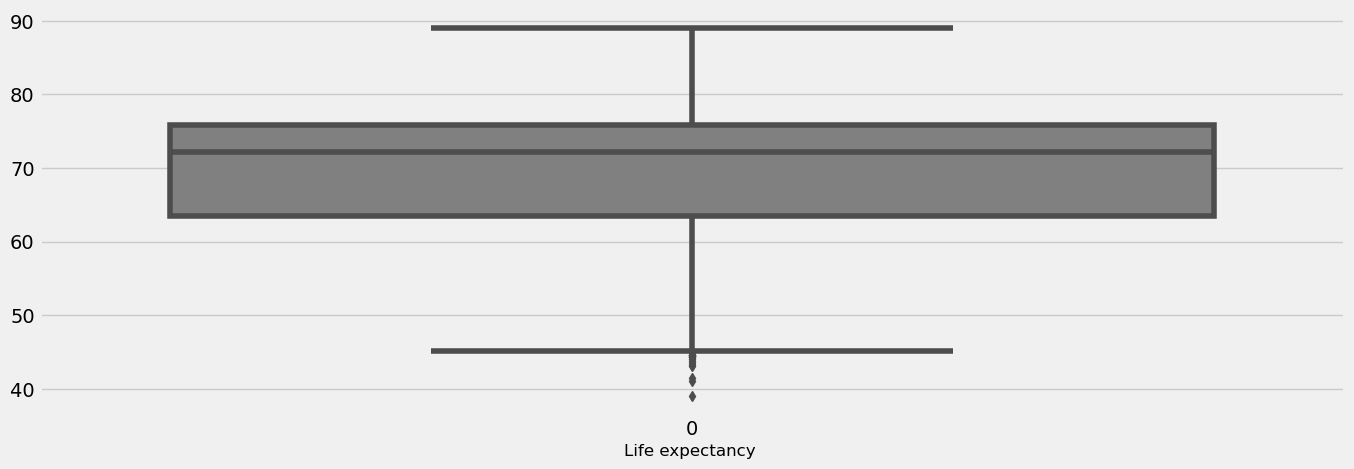

In [7]:
# Because we want to predict the Life Expectancy, let's check the Target Class Balance

# check the boxplots for the target class
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Life expectancy

sns.boxplot(df['Life expectancy '].values, color = 'grey')
plt.xlabel('Life expectancy ', fontsize = 12)
print(f"The life expectancy average is: {df['Life expectancy '].mean()}, and the standard deviation is: {df['Life expectancy '].std()}")

 From the above chart, we can see the distribution of the life expectancy; Where the average is around 69 years and the standard deviation is 9.5.

# Treatment of Missing Values

Now, we would like to check whether null values exist in our data.

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to various reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [8]:
df.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                     604
Adult Mortality                       9
infant deaths                         0
Alcohol                             194
percentage expenditure                0
Hepatitis B                         553
Measles                               0
 BMI                                 34
under-five deaths                     0
Polio                                19
Total expenditure                   226
Diphtheria                           19
 HIV/AIDS                             0
GDP                                 447
Population                          651
 thinness  1-19 years                34
 thinness 5-9 years                  34
Income composition of resources     166
Schooling                           162
ID                                 2342
dtype: int64

In [9]:
# missing values in data set

# calculate the total missing values in the dataset
train_total = df.isnull().sum()

# calculate the percentage of missing values in the dataset
train_percent = ((df.isnull().sum()/df.shape[0])*100).round(2)

# make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent],
                                axis=1, 
                                keys=['Total missing values', '% of missing values'],
                                sort = True)

train_missing_data.style.background_gradient(cmap = 'BuGn')

## Missing Values for Target Class - Life Expectancy

In [10]:
# df[df['Life expectancy '].isnull()]

df[df['Life expectancy '].isnull() & df['ID'].isnull()]

Country  Year      Status  Life expectancy   \
610                Dominica  2013  Developing               NaN   
1313       Marshall Islands  2013  Developing               NaN   
1369                 Monaco  2013  Developing               NaN   
1442                  Nauru  2013  Developing               NaN   
1523                   Niue  2013  Developing               NaN   
1563                  Palau  2013  Developing               NaN   
1739  Saint Kitts and Nevis  2013  Developing               NaN   
1777             San Marino  2013  Developing               NaN   
2173                 Tuvalu  2013  Developing               NaN   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
610               NaN              0     0.01               11.419555   
1313              NaN              0     0.01              871.878317   
1369              NaN              0     0.01                0.000000   
1442              NaN              0     0.01               15.606596   
1523              NaN              0     0.01                0.000000   
1563              NaN              0      NaN              344.690631   
1739              NaN              0     8.54                0.000000   
1777              NaN              0     0.01                0.000000   
2173              NaN              0     0.01               78.281203   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  \
610          96.0         0   58.4                   0   96.0   
1313          8.0         0   81.6                   0   79.0   
1369         99.0         0    NaN                   0   99.0   
1442         87.0         0   87.3                   0   87.0   
1523         99.0         0   77.3                   0   99.0   
1563         99.0         0   83.3                   0   99.0   
1739         97.0         0    5.2                   0   96.0   
1777         69.0         0    NaN                   0   69.0   
2173          9.0         0   79.3                   0    9.0   

      Total expenditure  Diphtheria    HIV/AIDS          GDP  Population  \
610                5.58         96.0        0.1   722.756650         NaN   
1313              17.24         79.0        0.1  3617.752354         NaN   
1369               4.30         99.0        0.1          NaN         NaN   
1442               4.65         87.0        0.1   136.183210         NaN   
1523               7.20         99.0        0.1          NaN         NaN   
1563               9.27         99.0        0.1  1932.122370       292.0   
1739               6.14         96.0        0.1          NaN         NaN   
1777               6.50         69.0        0.1          NaN         NaN   
2173              16.61          9.0        0.1  3542.135890      1819.0   

       thinness  1-19 years   thinness 5-9 years  \
610                     2.7                  2.6   
1313                    0.1                  0.1   
1369                    NaN                  NaN   
1442                    0.1                  0.1   
1523                    0.1                  0.1   
1563                    0.1                  0.1   
1739                    3.7                  3.6   
1777                    NaN                  NaN   
2173                    0.2                  0.1   

      Income composition of resources  Schooling  ID  
610                             0.721       12.7 NaN  
1313                              NaN        0.0 NaN  
1369                              NaN        NaN NaN  
1442                              NaN        9.6 NaN  
1523                              NaN        NaN NaN  
1563                            0.779       14.2 NaN  
1739                            0.749       13.4 NaN  
1777                              NaN       15.1 NaN  
2173                              NaN        0.0 NaN

Upon observation we find that the country with missing life_expectancy, have data for only 1 year (2013).

So the most appropriate thing to do is impute it with mean of Developing Country, as these are developing countries located in Oceania.

However, these countries have a lot of other missing data. Hence, we decided to drop them

In [11]:
df.drop(df[df['Life expectancy '].isnull() & df['ID'].isnull()].index, inplace = True)


## Missing Values for Alcohol & Schooling columns

In [12]:
df[df['Alcohol'].isnull()]

Country  Year      Status  \
40                                  Angola  2015  Developing   
67                               Argentina  2015  Developing   
89                               Australia  2015   Developed   
102                                Austria  2015   Developed   
115                             Azerbaijan  2015  Developing   
124                                Bahamas  2015  Developing   
140                                Bahrain  2015  Developing   
172                                Belarus  2015  Developing   
184                                Belgium  2015   Developed   
249                 Bosnia and Herzegovina  2015  Developing   
263                               Botswana  2015  Developing   
276                                 Brazil  2015  Developing   
290                      Brunei Darussalam  2015  Developing   
303                               Bulgaria  2015   Developed   
319                           Burkina Faso  2015  Developing   
356                             Cabo Verde  2015  Developing   
367                               Cambodia  2015  Developing   
380                               Cameroon  2015  Developing   
390                                 Canada  2015  Developing   
398               Central African Republic  2015  Developing   
409                                   Chad  2015  Developing   
435                                  China  2015  Developing   
448                               Colombia  2015  Developing   
463                                Comoros  2015  Developing   
478                                  Congo  2015  Developing   
491                             Costa Rica  2015  Developing   
531                                 Cyprus  2015   Developed   
545                                Czechia  2015   Developed   
559  Democratic People's Republic of Korea  2015  Developing   
574       Democratic Republic of the Congo  2015  Developing   
..                                     ...   ...         ...   
66        Bolivia (Plurinational State of)  2015  Developing   
83                                 Burundi  2015  Developing   
88                           Côte d'Ivoire  2015  Developing   
122                                  Chile  2015  Developing   
134                                Croatia  2015   Developed   
139                                   Cuba  2015  Developing   
150                                Denmark  2015   Developed   
152                               Djibouti  2015  Developing   
182                                Finland  2015  Developing   
186                                  Gabon  2015  Developing   
198                                  Ghana  2015  Developing   
208                              Guatemala  2015  Developing   
211                                 Guinea  2015  Developing   
225                               Honduras  2015  Developing   
289                             Kyrgyzstan  2015  Developing   
315                             Luxembourg  2015   Developed   
334                                   Mali  2015  Developing   
350                             Montenegro  2005  Developing   
352                                Morocco  2015  Developing   
377                              Nicaragua  2015  Developing   
422                                 Rwanda  2015  Developing   
455                               Slovakia  2015   Developed   
459                               Slovenia  2015   Developed   
470                            South Sudan  2007  Developing   
471                            South Sudan  2000  Developing   
524                                  Tonga  2015  Developing   
569                                Uruguay  2015  Developing   
573                                Vanuatu  2015  Developing   
582                                  Yemen  2015  Developing   
586                                 Zambia  2015  Developing   

     Life expectancy   Adult Mortality  infant deaths  Alcohol  \


All the data for alcohol missing is from 2015

In [13]:
df[(df['Status'] == 'Developed') &
  (df['Alcohol'].notna())]['Alcohol'].mean()

9.826735537190078

In [14]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)

In [15]:
df = df.drop(['Alcohol'], axis = 1)

In [16]:
# df['Alcohol'] = np.where(((df['Status'] == 'Developing') &
#         (df['Alcohol'].isna())), df[(df['Status'] == 'Developing') & (df['Alcohol'].notna())]['Alcohol'].mean(),
#         df['Alcohol'])

# df['Alcohol'] = np.where(((df['Status'] == 'Developed') &
#         (df['Alcohol'].isna())), df[(df['Status'] == 'Developed') & (df['Alcohol'].notna())]['Alcohol'].mean(),
#         df['Alcohol'])

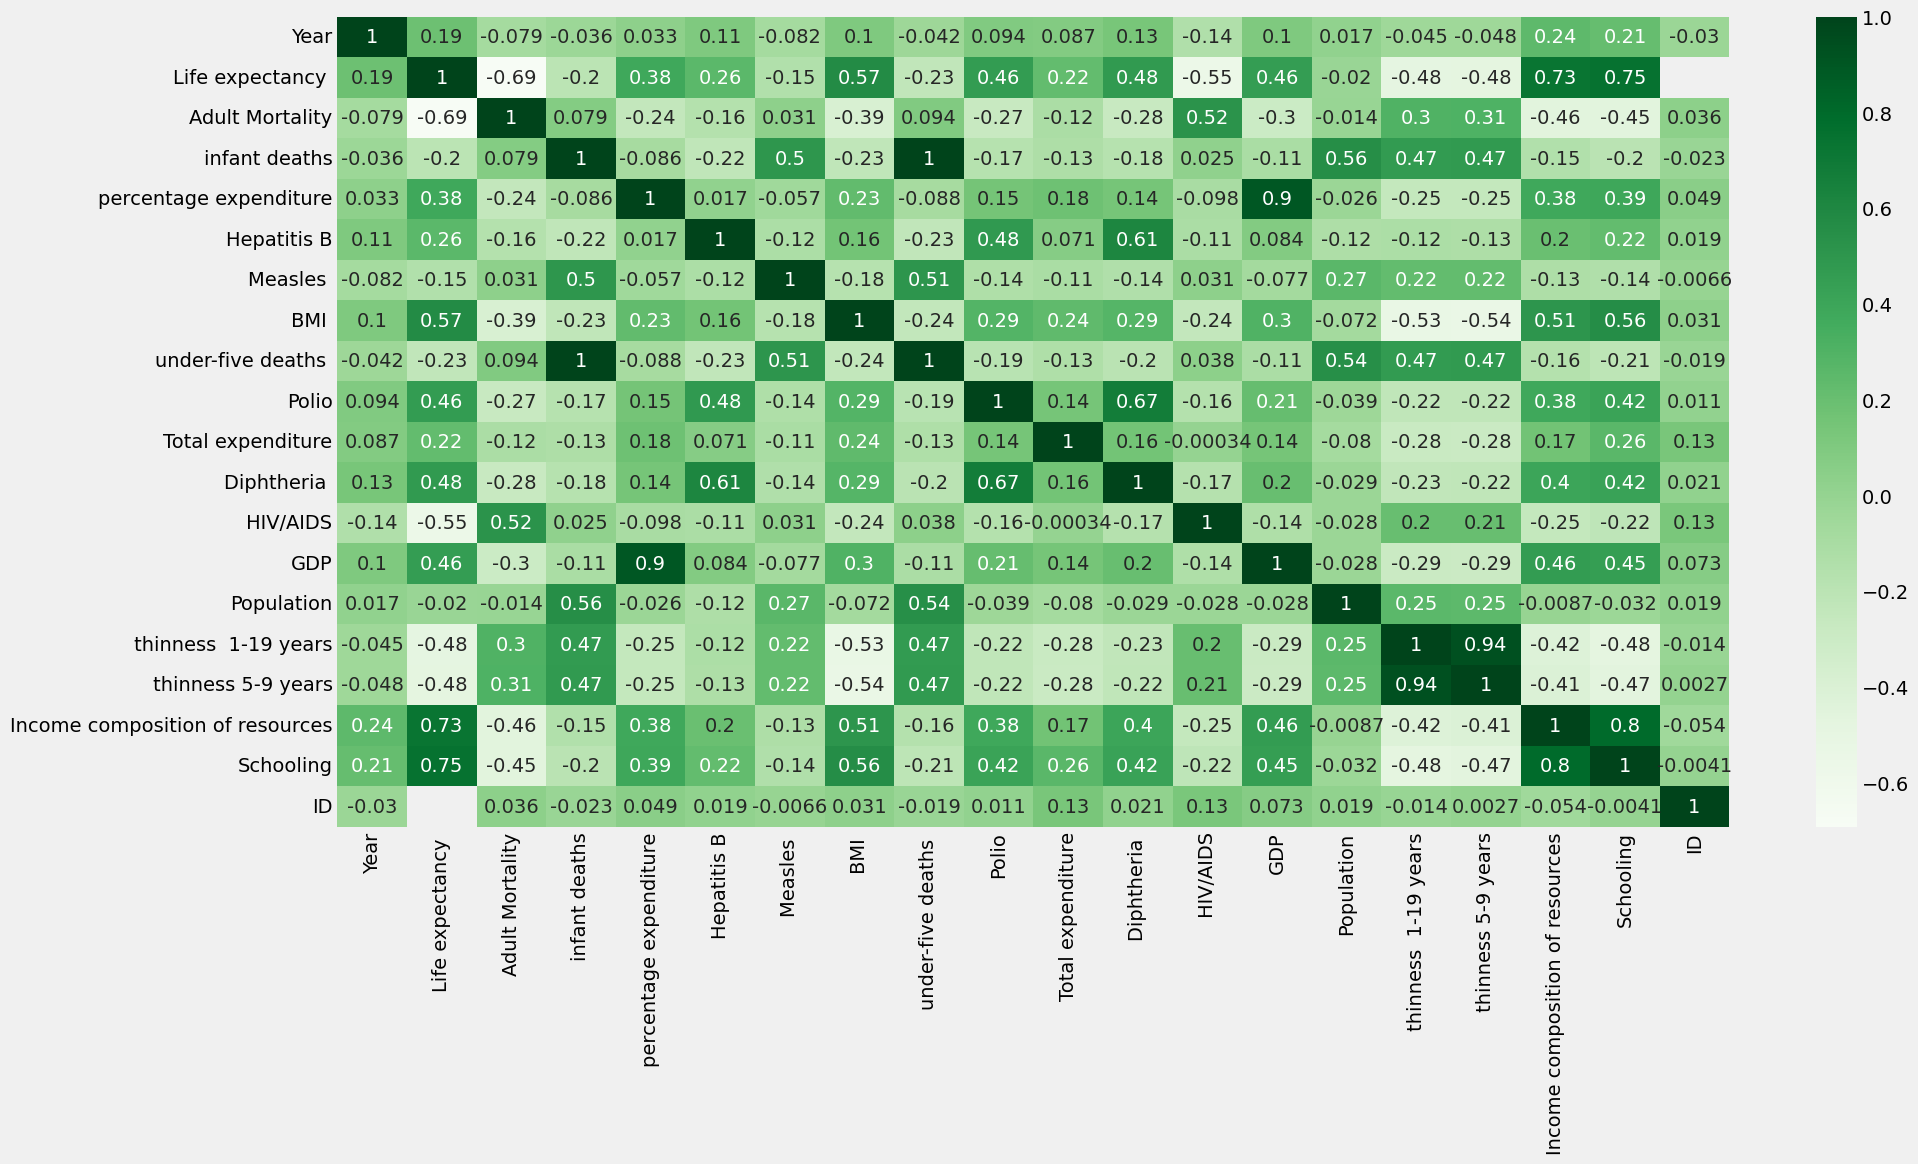

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [18]:
# # lets understand the impact of Alcohol on Schooling
# px.scatter(df, y = 'Alcohol',
#            x = 'Schooling',
#            marginal_y = 'violin',
#            trendline = 'ols')

From the above scatter plot we can see that there is some linear relationship between Alcohol to Schooling. Hence, we will impute the missing values of Alcohol regarding to this relationship.

In [19]:
imputer = KNNImputer(n_neighbors=1)
arr = imputer.fit_transform(df[['Income composition of resources','Schooling','Life expectancy ']])

Schooling = []

for i in range(len(arr)):
    Schooling.append(arr[i][1])

df['Schooling'] = Schooling

## Missing Values for BMI & Thinness columns

In [20]:
newdf = df[df[' BMI '].isnull() &
  df[' thinness 5-9 years'].isnull() &
  df[' thinness  1-19 years'].isnull()]

newdf = newdf.reset_index()
newdf = newdf.drop('index', axis=1)
newdf.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  South Sudan  2015  Developing              57.3            332.0   
1  South Sudan  2014  Developing              56.6            343.0   
2  South Sudan  2013  Developing              56.4            345.0   
3  South Sudan  2012  Developing              56.0            347.0   
4  South Sudan  2011  Developing              55.4            355.0   

   infant deaths  percentage expenditure  Hepatitis B  Measles    BMI   \
0             26                0.000000         31.0       878    NaN   
1             26               46.074469          NaN       441    NaN   
2             26               47.444530          NaN       525    NaN   
3             26               38.338232          NaN      1952    NaN   
4             27                0.000000          NaN      1256    NaN   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  39   41.0                NaN         31.0        3.4   
1                  39   44.0               2.74         39.0        3.5   
2                  40    5.0               2.62         45.0        3.6   
3                  40   64.0               2.77         59.0        3.8   
4                  41   66.0                NaN         61.0        3.9   

           GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0   758.725782  11882136.0                    NaN                  NaN   
1  1151.861715   1153971.0                    NaN                  NaN   
2  1186.113250   1117749.0                    NaN                  NaN   
3   958.455810   1818258.0                    NaN                  NaN   
4   176.971300   1448857.0                    NaN                  NaN   

   Income composition of resources  Schooling  ID  
0                            0.421        4.9 NaN  
1                            0.421        4.9 NaN  
2                            0.417        4.9 NaN  
3                            0.419        4.9 NaN  
4                            0.429        4.9 NaN

The life expectancy average is: 57.573076923076925, and the standard deviation is: 4.3650940601373245, the min value is: 49.6, and the max is: 67.0


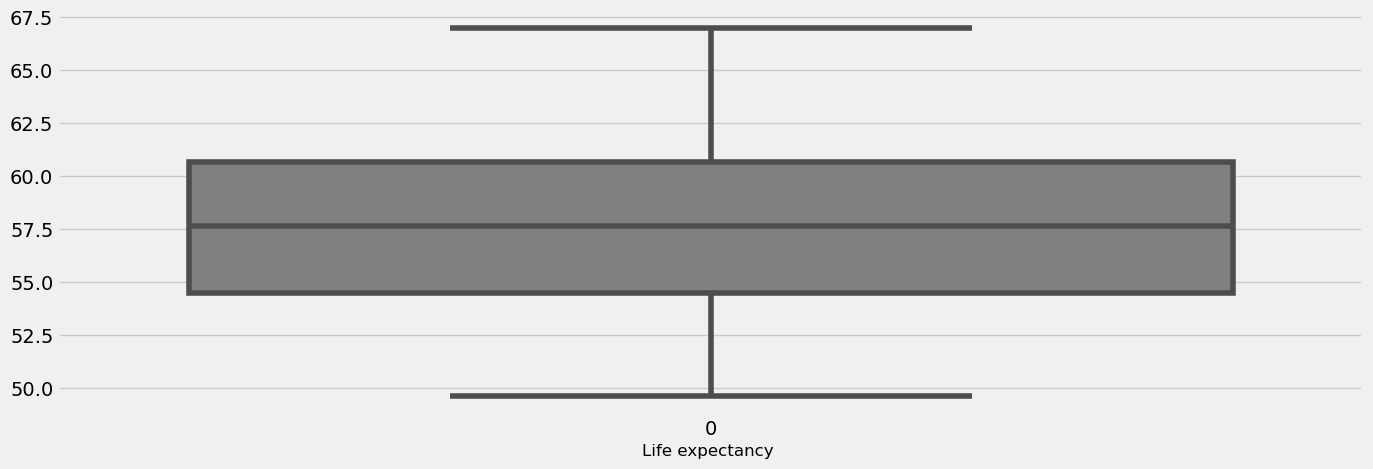

In [21]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Life expectancy

sns.boxplot(newdf['Life expectancy '], color = 'grey')
plt.xlabel('Life expectancy ', fontsize = 12)
print(f"The life expectancy average is: {newdf['Life expectancy '].mean()}, and the standard deviation is: {newdf['Life expectancy '].std()}, the min value is: {newdf['Life expectancy '].min()}, and the max is: {newdf['Life expectancy '].max()}")

From the box plot above we can conclude that for the null values in BMI & thinness columns - the life expectancy almost distributed normally. Hence, we will impute the mean values for the life expectancy that distributed around newdf['Life expectancy'].min() to newdf['Life expectancy'].max()

In [22]:
# df[' BMI '] = df[' BMI '].fillna(df[(df['Life expectancy '] >= newdf['Life expectancy '].min()) & 
#   (df['Life expectancy '] <= newdf['Life expectancy '].max())][' BMI '].mean())

# df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(df[(df['Life expectancy '] >= newdf['Life expectancy '].min()) & 
#   (df['Life expectancy '] <= newdf['Life expectancy '].max())][' thinness 5-9 years'].mean())

# df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(df[(df['Life expectancy '] >= newdf['Life expectancy '].min()) & 
#   (df['Life expectancy '] <= newdf['Life expectancy '].max())][' thinness  1-19 years'].mean())


In [23]:
imputer = KNNImputer(n_neighbors=10)
arr = imputer.fit_transform(df[[' thinness  1-19 years',' thinness 5-9 years',' BMI ','Life expectancy ']])

f = []
s = []
t = []

for i in range(len(arr)):
    f.append(arr[i][0])
    s.append(arr[i][1])
    t.append(arr[i][2])
    
df[' thinness  1-19 years'] = f
df[' thinness 5-9 years'] = s
df[' BMI '] = t

## Missing values for Hepatitis B

In [24]:
df[df['Hepatitis B'].isnull()]

Country  Year      Status  \
36                                              Algeria  2003  Developing   
37                                              Algeria  2002  Developing   
38                                              Algeria  2001  Developing   
39                                              Algeria  2000  Developing   
48                                               Angola  2006  Developing   
49                                               Angola  2005  Developing   
50                                               Angola  2004  Developing   
51                                               Angola  2002  Developing   
52                                               Angola  2001  Developing   
53                                               Angola  2000  Developing   
77                                            Argentina  2000  Developing   
101                                           Australia  2000   Developed   
139                                             Bahamas  2000  Developing   
160                                          Bangladesh  2002  Developing   
161                                          Bangladesh  2001  Developing   
162                                          Bangladesh  2000  Developing   
224                                               Benin  2001  Developing   
225                                               Benin  2000  Developing   
259                              Bosnia and Herzegovina  2003  Developing   
260                              Bosnia and Herzegovina  2002  Developing   
261                              Bosnia and Herzegovina  2001  Developing   
262                              Bosnia and Herzegovina  2000  Developing   
329                                        Burkina Faso  2004  Developing   
330                                        Burkina Faso  2003  Developing   
331                                        Burkina Faso  2002  Developing   
332                                        Burkina Faso  2001  Developing   
341                                             Burundi  2003  Developing   
342                                             Burundi  2001  Developing   
343                                             Burundi  2000  Developing   
355                                       Côte d'Ivoire  2000  Developing   
...                                                 ...   ...         ...   
2797                                            Somalia  2010  Developing   
2803                                        South Sudan  2007  Developing   
2804                                        South Sudan  2000  Developing   
2813                                          Sri Lanka  2000  Developing   
2821                                           Suriname  2004  Developing   
2822                                           Suriname  2002  Developing   
2826                                             Sweden  2009   Developed   
2827                                             Sweden  2008   Developed   
2828                                             Sweden  2002   Developed   
2829                                        Switzerland  2013   Developed   
2830                                        Switzerland  2012   Developed   
2831                                        Switzerland  2007   Developed   
2832                                        Switzerland  2006   Developed   
2833                                        Switzerland  2004   Developed   
2834                                        Switzerland  2002   Developed   
2842                                         Tajikistan  2000  Developing   
2848          The former Yugoslav republic of Macedonia  2004  Developing   
2849          The former Yugoslav republic of Macedonia  2003  Developing   
2850          The former Yugoslav republic of Macedonia  2000  Developing   
2852                                        Timor-Leste  2005  Developing   
2853                                        

The average is: 80.96084210526315, and the standard deviation is: 25.01833664784717, the min value is: 1.0, and the max is: 99.0


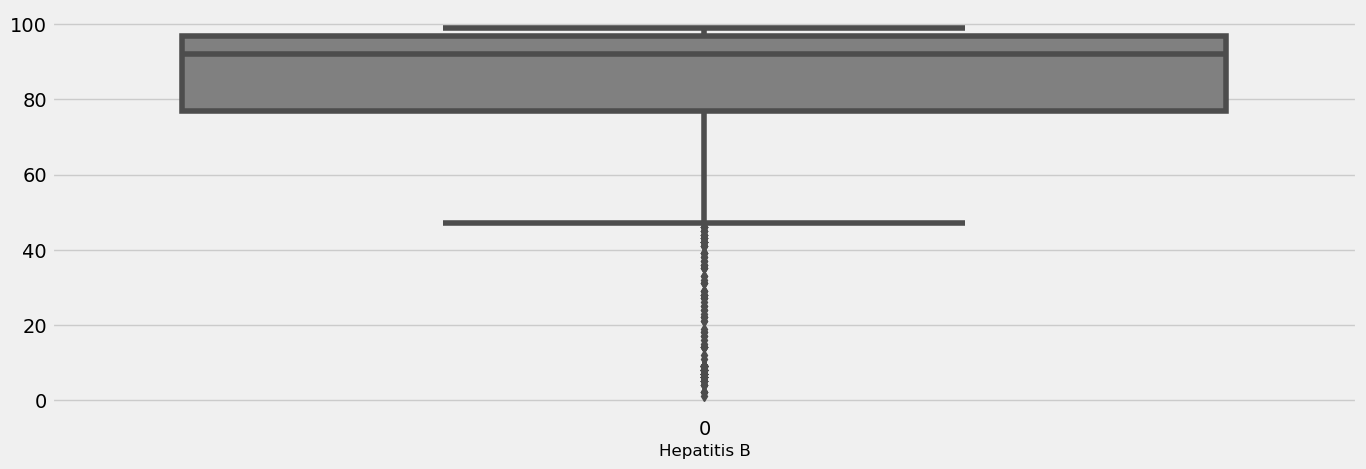

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Life expectancy

sns.boxplot(df['Hepatitis B'].values, color = 'grey')
plt.xlabel('Hepatitis B', fontsize = 12)
print(f"The average is: {df['Hepatitis B'].mean()}, and the standard deviation is: {df['Hepatitis B'].std()}, the min value is: {df['Hepatitis B'].min()}, and the max is: {df['Hepatitis B'].max()}")

In [26]:
arr = imputer.fit_transform(df[['Hepatitis B','Life expectancy ']])

hep = []

for i in range(len(arr)):
    hep.append(arr[i][0])
    
df['Hepatitis B'] = hep

## Missing for Polio and Diphtheria

In [27]:
df[df['Polio'].isnull()]

Country  Year      Status  Life expectancy   Adult Mortality  \
1388   Montenegro  2004  Developing              73.5            134.0   
1389   Montenegro  2003  Developing              73.5            134.0   
1390   Montenegro  2002  Developing              73.4            136.0   
1391   Montenegro  2001  Developing              73.3            136.0   
1935  South Sudan  2010  Developing              55.0            359.0   
1936  South Sudan  2009  Developing              54.3            369.0   
1937  South Sudan  2008  Developing              53.6            377.0   
1938  South Sudan  2006  Developing              52.5            383.0   
1939  South Sudan  2005  Developing              51.9            383.0   
1940  South Sudan  2004  Developing              51.4            383.0   
1941  South Sudan  2003  Developing              58.0            383.0   
1942  South Sudan  2002  Developing              52.0            382.0   
1943  South Sudan  2001  Developing              49.6            381.0   
2085  Timor-Leste  2001  Developing              59.4            269.0   
2086  Timor-Leste  2000  Developing              58.7            276.0   
2683   Montenegro  2005  Developing               NaN            133.0   
2684   Montenegro  2000  Developing               NaN            144.0   
2803  South Sudan  2007  Developing               NaN            381.0   
2804  South Sudan  2000  Developing               NaN             38.0   

      infant deaths  percentage expenditure  Hepatitis B  Measles        BMI   \
1388              0               57.121901    92.400000         0  55.000000   
1389              0              495.078296    92.400000         0  54.200000   
1390              0               36.480240    71.100000         0  53.500000   
1391              0               33.669814    94.200000         0  52.700000   
1935             27                0.000000    72.100000         0  13.240000   
1936             27                0.000000    68.200000         0  14.190000   
1937             27                0.000000    80.600000         0  20.510000   
1938             28                0.000000    57.100000         0  16.070000   
1939             28                0.000000    69.600000         0  16.440000   
1940             29                0.000000    68.800000         0  12.360000   
1941             29                0.000000    63.200000         0  23.710000   
1942             30                0.000000    62.900000         0  18.550000   
1943             30                0.000000    61.900000         0  16.630000   
2085              3                6.556583    73.400000         0  12.300000   
2086              3               49.069672    67.800000         0  11.900000   
2683              0              527.307672    80.960842         0  55.700000   
2684              0              274.547260    80.960842         0  51.900000   
2803             27                0.000000    80.960842         0  38.235394   
2804             31                0.000000    80.960842         0  38.235394   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
1388                   0    NaN               8.45          NaN        0.1   
1389                   0    NaN               8.91          NaN        0.1   
1390                   0    NaN               8.33          NaN        0.1   
1391                   0    NaN               8.23          NaN        0.1   
1935                  41    NaN                NaN          NaN        4.0   
1936                  42    NaN                NaN          NaN        4.2   
1937                  42    NaN                NaN          NaN        4.2   
1938                  43    NaN                NaN          NaN        4.1   
1939                  44    NaN                NaN          NaN        3.9   
1940                  45    NaN                NaN          NaN        3.8   
1941                  46    NaN                NaN

In [28]:
# lets understand the impact of Polio on Diphtheria
px.scatter(df, y = 'Polio',
           x = 'Diphtheria ',
           marginal_y = 'violin',
           trendline = 'ols')

From the above correlation map we can see that Polio and Diphtheria are highly correlated. Hence we will impute these missing values regarding their linear relationship.

In [29]:
imputer = KNNImputer(n_neighbors=1)
arr = imputer.fit_transform(df[['Polio','Diphtheria ']])

Polio = []
Diphtheria = []

for i in range(len(arr)):
    Polio.append(arr[i][0])
    Diphtheria.append(arr[i][1])
    
df['Polio'] = Polio
df['Diphtheria '] = Diphtheria

## Missing Values for Total expenditure

In [30]:
df[df['Total expenditure'].isnull()]

Country  Year      Status  \
40                                   Angola  2015  Developing   
67                                Argentina  2015  Developing   
89                                Australia  2015   Developed   
102                                 Austria  2015   Developed   
115                              Azerbaijan  2015  Developing   
124                                 Bahamas  2015  Developing   
140                                 Bahrain  2015  Developing   
172                                 Belarus  2015  Developing   
184                                 Belgium  2015   Developed   
249                  Bosnia and Herzegovina  2015  Developing   
263                                Botswana  2015  Developing   
276                                  Brazil  2015  Developing   
290                       Brunei Darussalam  2015  Developing   
303                                Bulgaria  2015   Developed   
319                            Burkina Faso  2015  Developing   
356                              Cabo Verde  2015  Developing   
367                                Cambodia  2015  Developing   
380                                Cameroon  2015  Developing   
390                                  Canada  2015  Developing   
398                Central African Republic  2015  Developing   
409                                    Chad  2015  Developing   
435                                   China  2015  Developing   
448                                Colombia  2015  Developing   
463                                 Comoros  2015  Developing   
478                                   Congo  2015  Developing   
491                              Costa Rica  2015  Developing   
531                                  Cyprus  2015   Developed   
545                                 Czechia  2015   Developed   
559   Democratic People's Republic of Korea  2015  Developing   
560   Democratic People's Republic of Korea  2014  Developing   
...                                     ...   ...         ...   
2421                          Côte d'Ivoire  2015  Developing   
2455                                  Chile  2015  Developing   
2467                                Croatia  2015   Developed   
2472                                   Cuba  2015  Developing   
2478  Democratic People's Republic of Korea  2010  Developing   
2483                                Denmark  2015   Developed   
2485                               Djibouti  2015  Developing   
2515                                Finland  2015  Developing   
2519                                  Gabon  2015  Developing   
2531                                  Ghana  2015  Developing   
2541                              Guatemala  2015  Developing   
2544                                 Guinea  2015  Developing   
2558                               Honduras  2015  Developing   
2622                             Kyrgyzstan  2015  Developing   
2648                             Luxembourg  2015   Developed   
2667                                   Mali  2015  Developing   
2685                                Morocco  2015  Developing   
2710                              Nicaragua  2015  Developing   
2755                                 Rwanda  2015  Developing   
2788                               Slovakia  2015   Developed   
2792                               Slovenia  2015   Developed   
2796                                Somalia  2013  Developing   
2797                                Somalia  2010  Developing   
2803                            South Sudan  2007  Developing   
2804                            South Sudan  2000  Developing   
2857                                  Tonga  2015  Developing   
2902                                Uruguay  2015  Developing   
2906                                Vanuatu  2015  Developing   
2915                                  Yemen  2015  Developing   
2919                                 Zambia  2015  Developing   

     

We can see that there in no special pattern regarding these null values. Hence, we will impute the mean of this column.

The life expectancy average is: 5.930162842338996, and the standard deviation is: 2.4832729063507153, the min value is: 0.37, and the max is: 17.6


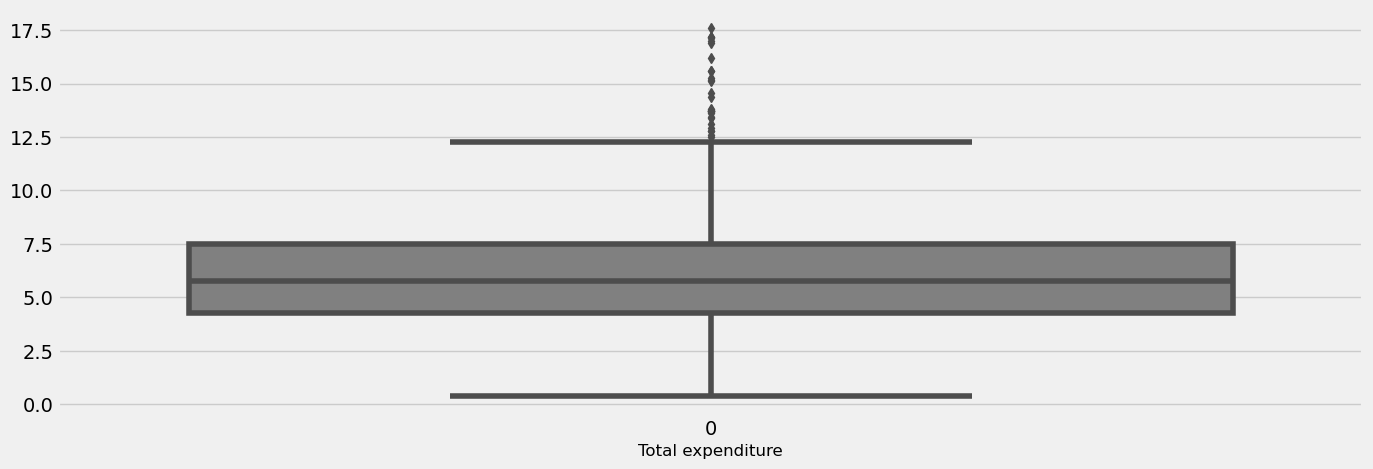

In [31]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Life expectancy

sns.boxplot(df['Total expenditure'], color = 'grey')
plt.xlabel('Total expenditure', fontsize = 12)
print(f"The life expectancy average is: {df['Total expenditure'].mean()}, and the standard deviation is: {df['Total expenditure'].std()}, the min value is: {df['Total expenditure'].min()}, and the max is: {df['Total expenditure'].max()}")

In [32]:
df = df.drop(['Total expenditure'], axis = 1)

In [33]:
# arr = imputer.fit_transform(df[['Total expenditure','Life expectancy ']])

# tot = []

# for i in range(len(arr)):
#     tot.append(arr[i][0])
    
# df['Total expenditure'] = tot

## Missing Values for GDP

In [34]:
df[df['GDP'].isnull()]

Country  Year      Status  \
124                                             Bahamas  2015  Developing   
125                                             Bahamas  2014  Developing   
126                                             Bahamas  2013  Developing   
127                                             Bahamas  2012  Developing   
128                                             Bahamas  2011  Developing   
129                                             Bahamas  2010  Developing   
130                                             Bahamas  2009  Developing   
131                                             Bahamas  2008  Developing   
132                                             Bahamas  2007  Developing   
133                                             Bahamas  2006  Developing   
134                                             Bahamas  2005  Developing   
135                                             Bahamas  2004  Developing   
136                                             Bahamas  2003  Developing   
137                                             Bahamas  2002  Developing   
138                                             Bahamas  2001  Developing   
139                                             Bahamas  2000  Developing   
238                    Bolivia (Plurinational State of)  2013  Developing   
239                    Bolivia (Plurinational State of)  2012  Developing   
240                    Bolivia (Plurinational State of)  2010  Developing   
241                    Bolivia (Plurinational State of)  2009  Developing   
242                    Bolivia (Plurinational State of)  2008  Developing   
243                    Bolivia (Plurinational State of)  2007  Developing   
244                    Bolivia (Plurinational State of)  2006  Developing   
245                    Bolivia (Plurinational State of)  2005  Developing   
246                    Bolivia (Plurinational State of)  2004  Developing   
247                    Bolivia (Plurinational State of)  2002  Developing   
248                    Bolivia (Plurinational State of)  2001  Developing   
344                                       Côte d'Ivoire  2012  Developing   
345                                       Côte d'Ivoire  2011  Developing   
346                                       Côte d'Ivoire  2010  Developing   
...                                                 ...   ...         ...   
2849          The former Yugoslav republic of Macedonia  2003  Developing   
2850          The former Yugoslav republic of Macedonia  2000  Developing   
2884  United Kingdom of Great Britain and Northern I...  2014   Developed   
2885  United Kingdom of Great Britain and Northern I...  2013   Developed   
2886  United Kingdom of Great Britain and Northern I...  2005   Developed   
2887  United Kingdom of Great Britain and Northern I...  2003   Developed   
2888                        United Republic of Tanzania  2014  Developing   
2889                        United Republic of Tanzania  2009  Developing   
2890                        United Republic of Tanzania  2007  Developing   
2891                        United Republic of Tanzania  2004  Developing   
2892                        United Republic of Tanzania  2001  Developing   
2893                        United Republic of Tanzania  2000  Developing   
2894                           United States of America  2014   Developed   
2895                           United States of America  2013   Developed   
2896                           United States of America  2010   Developed   
2897                           United States of America  2009   Developed   
2898                           United States of America  2007   Developed   
2899                           United States of America  2003   Developed   
2900                           United States of America  2002   Developed   
2901                           United States of America  2000   Developed   
2909                 Venezuela (Bolivarian R

In [35]:
df[['GDP','percentage expenditure']].corr()

GDP  percentage expenditure
GDP                     1.00000                 0.89937
percentage expenditure  0.89937                 1.00000

In [36]:
# the impact of Alcohol on Population
px.scatter(df, y = 'GDP',
           x = 'percentage expenditure',
           marginal_y = 'violin',
           trendline = 'ols')

From the Fig. above we can conclude that 'GDP' & 'percentage expenditure' share a good linear relationship which we can impute this data from their linear relationship without considering the whole data.

* We can also conclude that there are many outliers in these features which might hurt our model, we will treat outliers and anomalies further in our work.

In [37]:
imputer = KNNImputer(n_neighbors=1)
arr = imputer.fit_transform(df[['GDP','percentage expenditure']])

GDP = []

for i in range(len(arr)):
    GDP.append(arr[i][0])
    
df['GDP'] = GDP

## Missing values for Population

In [38]:
df[df['Population'].isnull()]

Country  Year      Status  \
54                                  Antigua and Barbuda  2014  Developing   
55                                  Antigua and Barbuda  2013  Developing   
56                                  Antigua and Barbuda  2012  Developing   
57                                  Antigua and Barbuda  2011  Developing   
58                                  Antigua and Barbuda  2010  Developing   
59                                  Antigua and Barbuda  2009  Developing   
60                                  Antigua and Barbuda  2008  Developing   
61                                  Antigua and Barbuda  2007  Developing   
62                                  Antigua and Barbuda  2006  Developing   
63                                  Antigua and Barbuda  2005  Developing   
64                                  Antigua and Barbuda  2003  Developing   
65                                  Antigua and Barbuda  2002  Developing   
66                                  Antigua and Barbuda  2001  Developing   
124                                             Bahamas  2015  Developing   
125                                             Bahamas  2014  Developing   
126                                             Bahamas  2013  Developing   
127                                             Bahamas  2012  Developing   
128                                             Bahamas  2011  Developing   
129                                             Bahamas  2010  Developing   
130                                             Bahamas  2009  Developing   
131                                             Bahamas  2008  Developing   
132                                             Bahamas  2007  Developing   
133                                             Bahamas  2006  Developing   
134                                             Bahamas  2005  Developing   
135                                             Bahamas  2004  Developing   
136                                             Bahamas  2003  Developing   
137                                             Bahamas  2002  Developing   
138                                             Bahamas  2001  Developing   
139                                             Bahamas  2000  Developing   
140                                             Bahrain  2015  Developing   
...                                                 ...   ...         ...   
2882                               United Arab Emirates  2007  Developing   
2883                               United Arab Emirates  2004  Developing   
2884  United Kingdom of Great Britain and Northern I...  2014   Developed   
2885  United Kingdom of Great Britain and Northern I...  2013   Developed   
2886  United Kingdom of Great Britain and Northern I...  2005   Developed   
2887  United Kingdom of Great Britain and Northern I...  2003   Developed   
2888                        United Republic of Tanzania  2014  Developing   
2889                        United Republic of Tanzania  2009  Developing   
2890                        United Republic of Tanzania  2007  Developing   
2891                        United Republic of Tanzania  2004  Developing   
2892                        United Republic of Tanzania  2001  Developing   
2893                        United Republic of Tanzania  2000  Developing   
2894                           United States of America  2014   Developed   
2895                           United States of America  2013   Developed   
2896                           United States of America  2010   Developed   
2897                           United States of America  2009   Developed   
2898                           United States of America  2007   Developed   
2899                           United States of America  2003   Developed   
2900                           United States of America  2002   Developed   
2901                           United States of America  2000   Developed   
2909                 Venezuela (Bolivarian R

The life expectancy average is: 12764541.774711037, and the standard deviation is: 61037647.16463728, the min value is: 34.0, and the max is: 1293859294.0


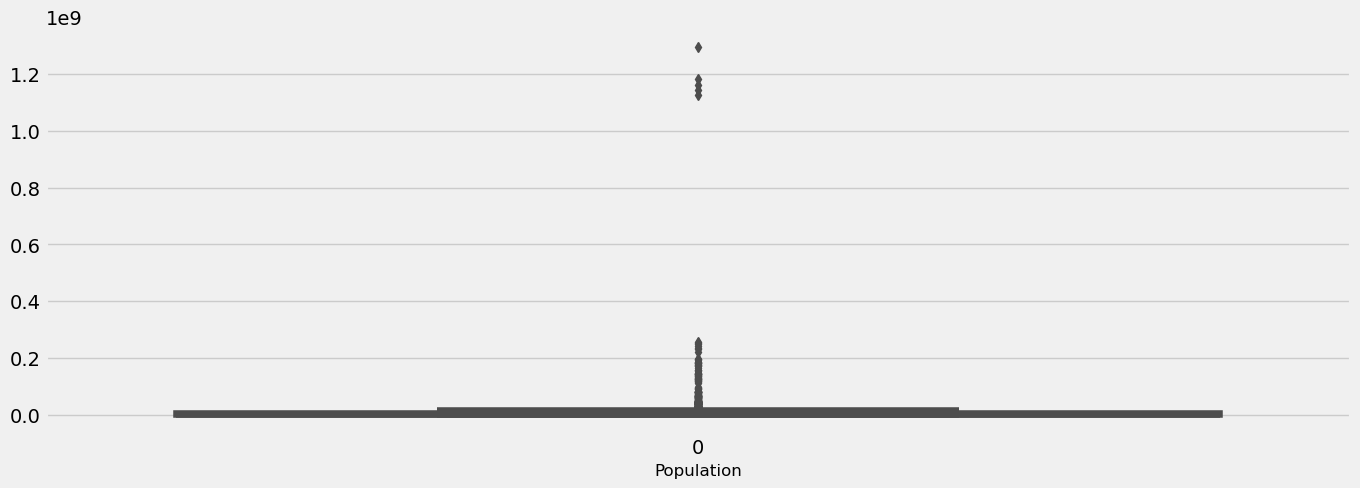

In [39]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Life expectancy

sns.boxplot(df['Population'], color = 'grey')
plt.xlabel('Population', fontsize = 12)
print(f"The life expectancy average is: {df['Population'].mean()}, and the standard deviation is: {df['Population'].std()}, the min value is: {df['Population'].min()}, and the max is: {df['Population'].max()}")

In [40]:
# the impact of Alcohol on Population
px.scatter(df, y = 'under-five deaths ',
           x = 'Population',
           marginal_y = 'violin',
           trendline = 'ols')

From the Fig. above we can conclude that 'under-five deaths' & 'Population' share some linear relationship which we can impute this data from their linear relationship without considering the whole data.

* We can also conclude that there are many outliers in these features which might hurt our model, we will treat outliers and anomalies further in our work.

In [41]:
df = df.drop(['Population'], axis = 1)

In [42]:
# imputer = KNNImputer(n_neighbors=1)
# arr = imputer.fit_transform(df[['under-five deaths ','Population']])

# Population = []

# for i in range(len(arr)):
#     Population.append(arr[i][1])
    
# df['Population'] = Population

## Missing Values for Income composition of resources	

In [43]:
df[df['Income composition of resources'].isnull()]

Country  Year      Status  \
344                                       Côte d'Ivoire  2012  Developing   
345                                       Côte d'Ivoire  2011  Developing   
346                                       Côte d'Ivoire  2010  Developing   
347                                       Côte d'Ivoire  2009  Developing   
348                                       Côte d'Ivoire  2008  Developing   
349                                       Côte d'Ivoire  2007  Developing   
350                                       Côte d'Ivoire  2005  Developing   
351                                       Côte d'Ivoire  2004  Developing   
352                                       Côte d'Ivoire  2003  Developing   
353                                       Côte d'Ivoire  2002  Developing   
354                                       Côte d'Ivoire  2001  Developing   
355                                       Côte d'Ivoire  2000  Developing   
545                                             Czechia  2015   Developed   
546                                             Czechia  2014   Developed   
547                                             Czechia  2013   Developed   
548                                             Czechia  2011   Developed   
549                                             Czechia  2010   Developed   
550                                             Czechia  2009   Developed   
551                                             Czechia  2008   Developed   
552                                             Czechia  2007   Developed   
553                                             Czechia  2006   Developed   
554                                             Czechia  2004   Developed   
555                                             Czechia  2003   Developed   
556                                             Czechia  2002   Developed   
557                                             Czechia  2001   Developed   
558                                             Czechia  2000   Developed   
559               Democratic People's Republic of Korea  2015  Developing   
560               Democratic People's Republic of Korea  2014  Developing   
561               Democratic People's Republic of Korea  2013  Developing   
562               Democratic People's Republic of Korea  2012  Developing   
...                                                 ...   ...         ...   
2478              Democratic People's Republic of Korea  2010  Developing   
2479                   Democratic Republic of the Congo  2013  Developing   
2480                   Democratic Republic of the Congo  2005  Developing   
2481                   Democratic Republic of the Congo  2004  Developing   
2482                   Democratic Republic of the Congo  2002  Developing   
2746                                  Republic of Korea  2013  Developing   
2747                                  Republic of Korea  2010  Developing   
2748                                  Republic of Korea  2006  Developing   
2749                                Republic of Moldova  2006  Developing   
2750                                Republic of Moldova  2002  Developing   
2796                                            Somalia  2013  Developing   
2797                                            Somalia  2010  Developing   
2884  United Kingdom of Great Britain and Northern I...  2014   Developed   
2885  United Kingdom of Great Britain and Northern I...  2013   Developed   
2886  United Kingdom of Great Britain and Northern I...  2005   Developed   
2887  United Kingdom of Great Britain and Northern I...  2003   Developed   
2888                        United Republic of Tanzania  2014  Developing   
2889                        United Republic of Tanzania  2009  Developing   
2890                        United Republic of Tanzania  2007  Developing   
2891                        United Republic of Tanzania  2004  Developing   
2892                        United Republic 

In [44]:
df[['Life expectancy ','Income composition of resources','Schooling']].corr()

Life expectancy   \
Life expectancy                          1.000000   
Income composition of resources          0.730757   
Schooling                                0.757089   

                                 Income composition of resources  Schooling  
Life expectancy                                         0.730757   0.757089  
Income composition of resources                         1.000000   0.800046  
Schooling                                               0.800046   1.000000

In [45]:
# px.scatter_3d(df.sort_values(by='Year'),
#               y='Income composition of resources',x='Life expectancy ',z='Schooling',size='Life expectancy ',
#               template='plotly_dark', color='Status')

From the above 3D Scatter plot we can clearly see that there is multivariate linear relationship between these features. Hence we will impute the missing values of 'Income composition of resources' regarding the nearest point for each missing value.

* We can also see that Developed countries have much more Income, life expectancy and schooling.

In [46]:
imputer = KNNImputer(n_neighbors=1)
arr = imputer.fit_transform(df[['Life expectancy ','Income composition of resources','Schooling']])

Income = []

for i in range(len(arr)):
    Income.append(arr[i][1])
    
df['Income composition of resources'] = Income

# Feature Engineering & Outliers Detection

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations
    
* Here, we are only going to perform Feature Engineering by Aggregating some features together.

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

In [47]:
# Lets first analyze the Numberical Columns
df.select_dtypes('number').head()

Year  Life expectancy   Adult Mortality  infant deaths  \
0  2015              65.0            263.0             62   
1  2013              59.9            268.0             66   
2  2012              59.5            272.0             69   
3  2011              59.2            275.0             71   
4  2010              58.8            279.0             74   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.219243         64.0       430   18.1                  89   
2               78.184215         67.0      2787   17.6                  93   
3                7.097109         68.0      3013   17.2                  97   
4               79.679367         66.0      1989   16.7                 102   

   Polio  Diphtheria    HIV/AIDS         GDP   thinness  1-19 years  \
0    6.0         65.0        0.1  584.259210                   17.2   
1   62.0         64.0        0.1  631.744976                   17.7   
2   67.0         67.0        0.1  669.959000                   17.9   
3   68.0         68.0        0.1   63.537231                   18.2   
4   66.0         66.0        0.1  553.328940                   18.4   

    thinness 5-9 years  Income composition of resources  Schooling  ID  
0                 17.3                            0.479       10.1 NaN  
1                 17.7                            0.470        9.9 NaN  
2                 18.0                            0.463        9.8 NaN  
3                 18.2                            0.454        9.5 NaN  
4                 18.4                            0.448        9.2 NaN

In [48]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2928.00000       2333.000000      2928.000000    2928.000000   
mean   2007.50000         69.302443       164.796448      30.407445   
std       4.61056          9.514162       124.292079     118.114450   
min    2000.00000         39.000000         1.000000       0.000000   
25%    2003.75000         63.500000        74.000000       0.000000   
50%    2007.50000         72.100000       144.000000       3.000000   
75%    2011.25000         75.800000       228.000000      22.000000   
max    2015.00000         89.000000       723.000000    1800.000000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2928.000000  2928.000000    2928.000000  2928.000000   
mean               740.321185    80.502571    2427.855874    38.072299   
std               1990.930605    22.948787   11485.970937    19.930961   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.853964    75.000000       0.000000    19.200000   
50%                 65.611455    89.000000      17.000000    43.000000   
75%                442.614322    96.000000     362.250000    56.100000   
max              19479.911610    99.000000  212183.000000    77.600000   

       under-five deaths         Polio  Diphtheria      HIV/AIDS  \
count         2928.000000  2928.000000  2928.000000  2928.000000   
mean            42.179303    82.548298    82.321416     1.747712   
std            160.700547    23.340548    23.629576     5.085542   
min              0.000000     3.000000     2.000000     0.100000   
25%              0.000000    78.000000    78.000000     0.100000   
50%              4.000000    93.000000    93.000000     0.100000   
75%             28.000000    97.000000    97.000000     0.800000   
max           2500.000000    99.000000    99.000000    50.600000   

                 GDP   thinness  1-19 years   thinness 5-9 years  \
count    2928.000000            2928.000000          2928.000000   
mean     6919.518534               4.876753             4.907151   
std     13227.369667               4.407223             4.494811   
min         1.681350               0.100000             0.100000   
25%       578.797095               1.600000             1.600000   
50%      3112.560501               3.400000             3.400000   
75%      4793.630903               7.200000             7.300000   
max    119172.741800              27.700000            28.600000   

       Income composition of resources    Schooling          ID  
count                      2928.000000  2928.000000  595.000000  
mean                          0.627122    12.002625  298.776471  
std                           0.210949     3.349419  172.207099  
min                           0.000000     0.000000    1.000000  
25%                           0.492000    10.100000  150.500000  
50%                           0.679000    12.300000  299.000000  
75%                           0.779000    14.300000  447.500000  
max                           0.948000    20.700000  596.000000

In [49]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'ID'],
      dtype='object')

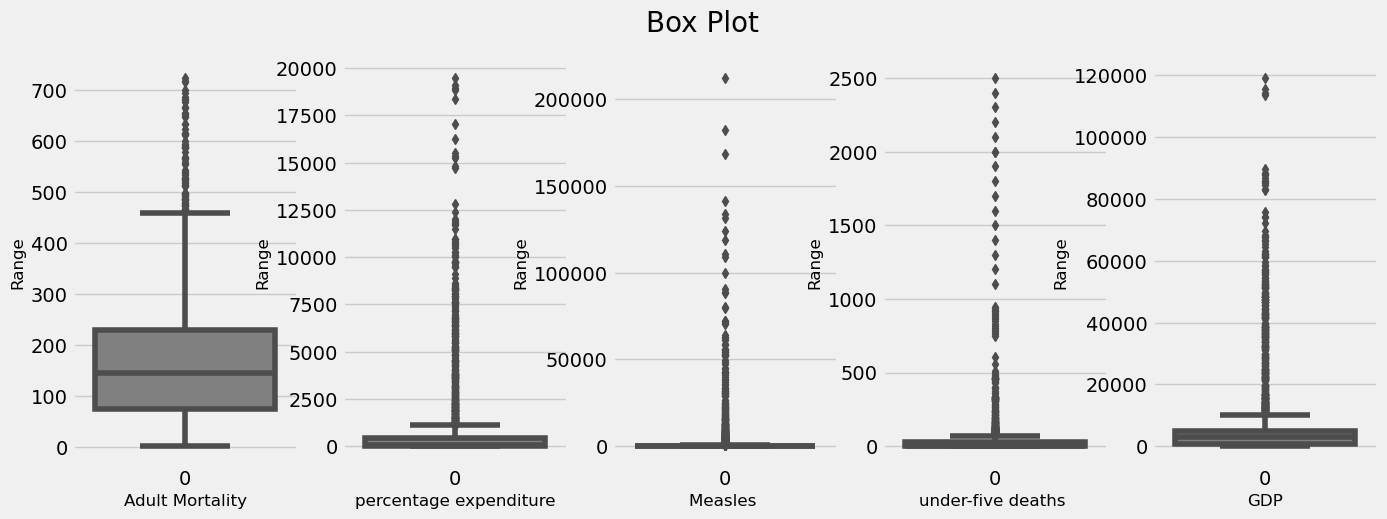

In [50]:
# check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for Adult Mortality
plt.subplot(1, 5, 1)
sns.boxplot(df['Adult Mortality'].values, color = 'grey')
plt.xlabel('Adult Mortality', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for percentage expenditureMeasles
plt.subplot(1, 5, 2)
sns.boxplot(df['percentage expenditure'].values, color = 'grey')
plt.xlabel('percentage expenditure', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for Measles
plt.subplot(1, 5, 3)
sns.boxplot(df['Measles '].values, color = 'grey')
plt.xlabel('Measles ', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for under-five deaths
plt.subplot(1, 5, 4)
sns.boxplot(df['under-five deaths '].values, color = 'grey')
plt.xlabel('under-five deaths ', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for GDP
plt.subplot(1, 5, 5)
sns.boxplot(df['GDP'].values, color = 'grey')
plt.xlabel('GDP', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

These are the columns that we suspect that we have outliers that can cause a missprediction to our model. We are now going to treat each one of them seperatly.

## Outlier Detection for Adult Mortality

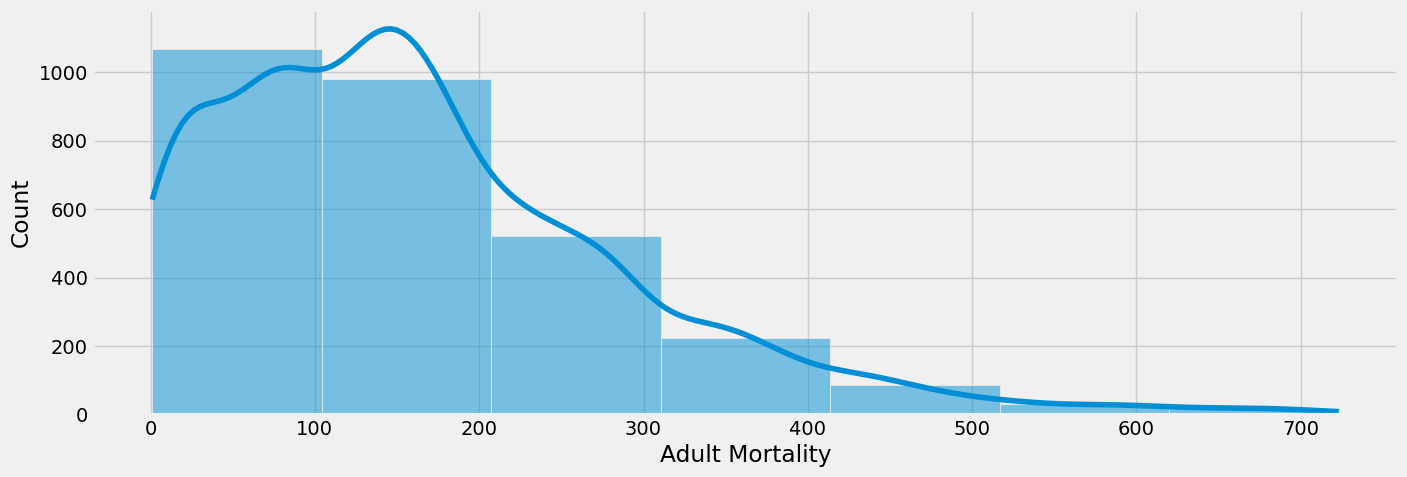

In [51]:
sns.histplot(x='Adult Mortality', data=df, bins=7,kde=True);

In [52]:
print(len(df[df['Adult Mortality'] > 600])/len(df))

0.007513661202185792


The percentage of Adult Mortality that their values is more than 500 is less then 1%, Hence we can drop the values that higher which they consider as outliers.

In [53]:
df = df[df['Adult Mortality'] < 700]

## Outlier Detection for percentage expenditure

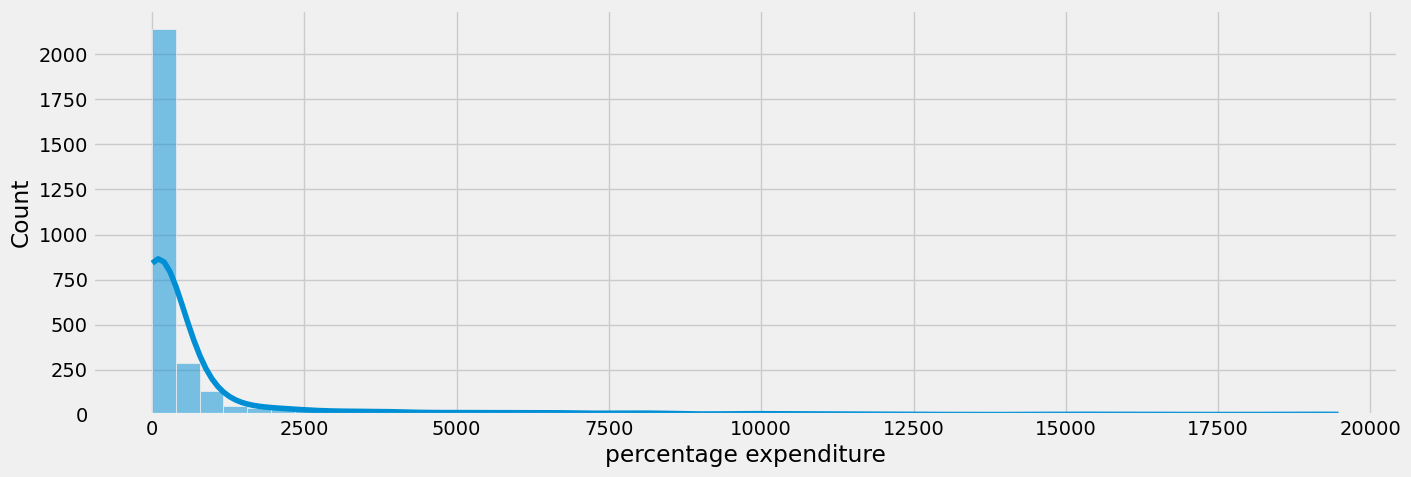

In [54]:
sns.histplot(x='percentage expenditure', data=df, bins=50,kde=True);

In [55]:
len(df[(df['percentage expenditure'] > 5000) &
  (df['Status'] == 'Developed')])/len(df[df['percentage expenditure'] > 5000])

0.8455882352941176

The percentage of percentage expenditure that is higher than 5000 and from developed countries is 86% from all the percentage expenditure that are higher than 5000.

Let's check the distribution of the percentage expenditure around developing countries.

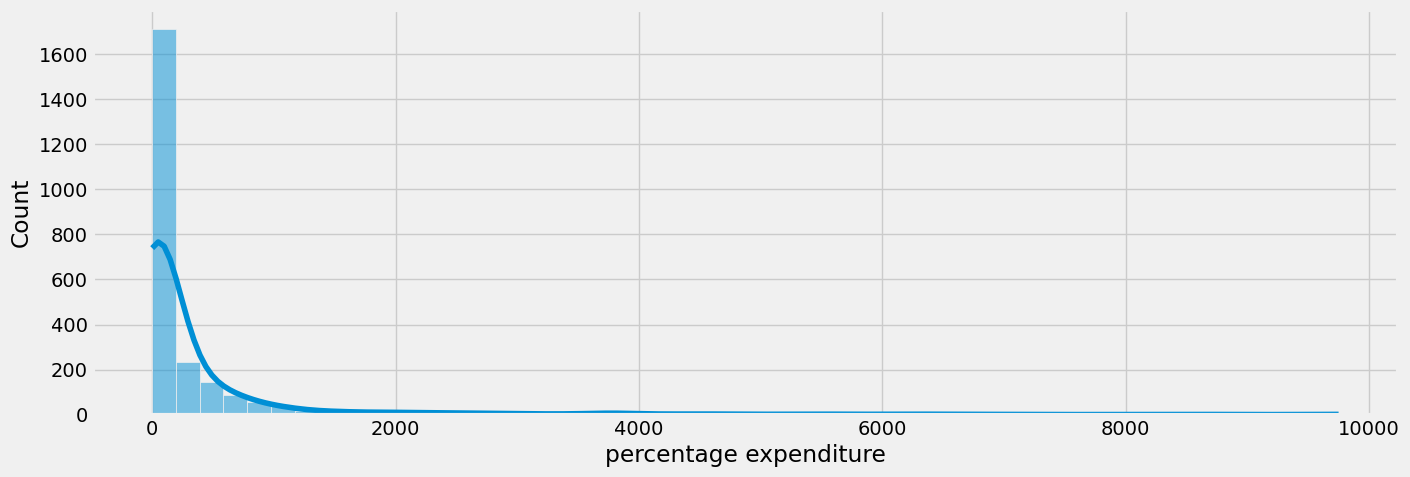

In [56]:
sns.histplot(x='percentage expenditure', data=df[(df['Status'] == 'Developing')], bins=50,kde=True);

In [57]:
len(df[(df['percentage expenditure'] > 3000) &
  (df['Status'] == 'Developing')])/len(df[(df['Status'] == 'Developing')])

0.02237878159966846

The percent of the percentage expenditure that is higher than 2000 and from all developing countries is 2.2% from all the data. Hence, we will drop these columns.

In [58]:
# df.drop(df[(df['percentage expenditure'] > 3000) &
#   (df['Status'] == 'Developing')].index, inplace=True)

## Outlier Detection for Measles

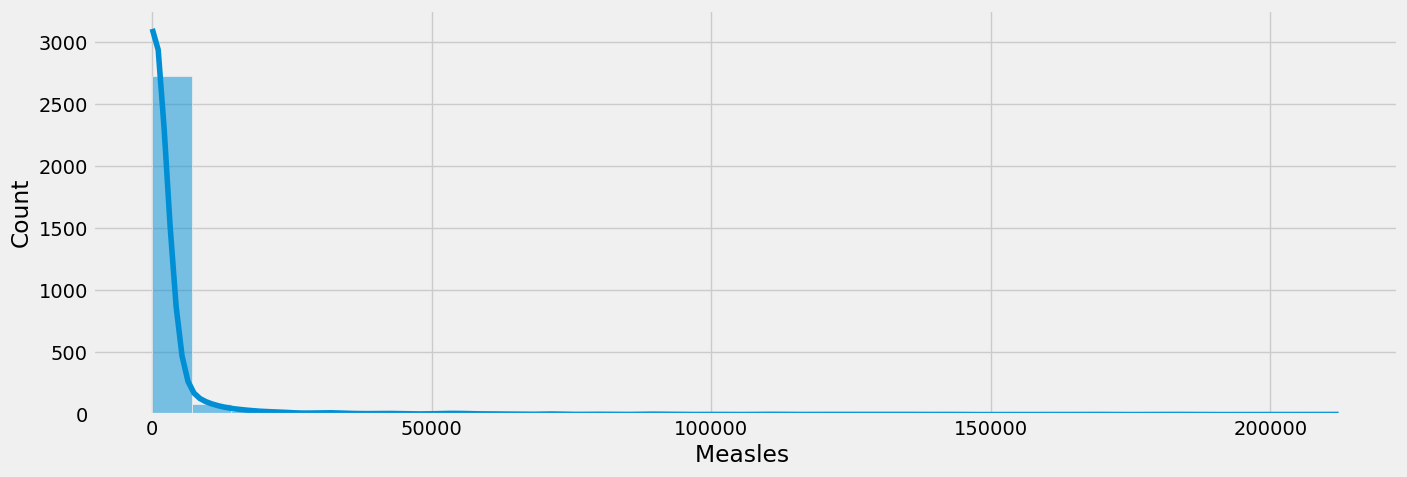

In [59]:
sns.histplot(x='Measles ', data=df, bins=30,kde=True);

In [60]:
round(len(df[df['Measles '] > 25000])/len(df),3)

0.023

The percentage of Measles that is > 25000 and from all of the data is 2.6% from all the data. Hence, we will drop these columns.

In [61]:
# df = df[df['Measles '] < 25000]

In [62]:
df = df.drop(['Measles '], axis = 1)

## Outlier Detection for under-five deaths

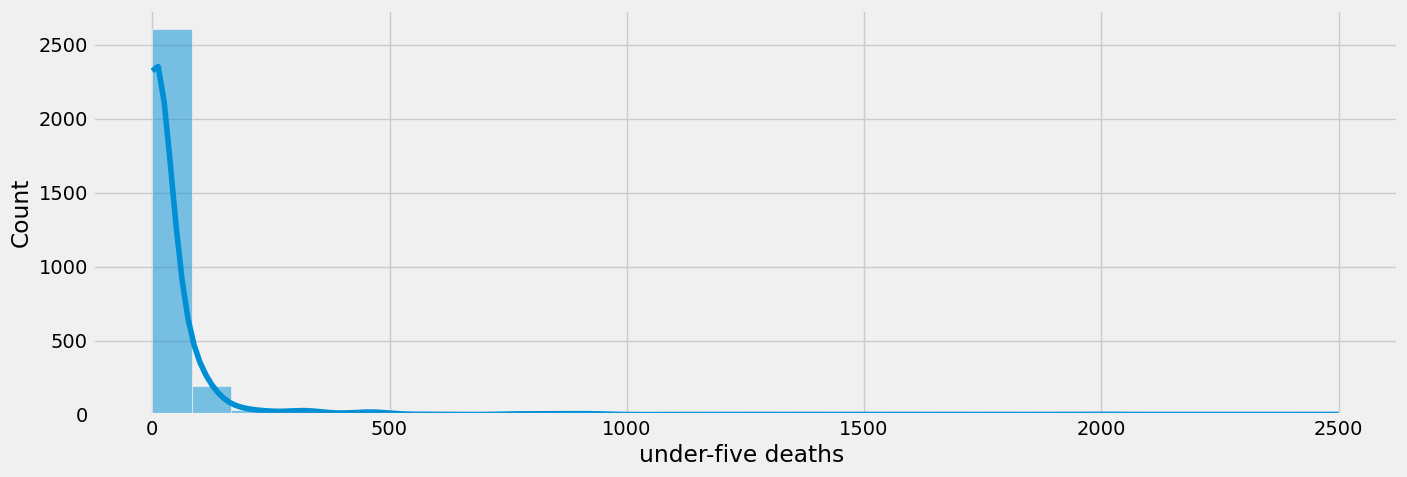

In [63]:
sns.histplot(x='under-five deaths ', data=df, bins=30,kde=True);

In [64]:
round(len(df[df['under-five deaths '] > 300])/len(df),3)

0.028

In [65]:
# df = df[df['under-five deaths '] < 300]

## Outlier Detection for GDP

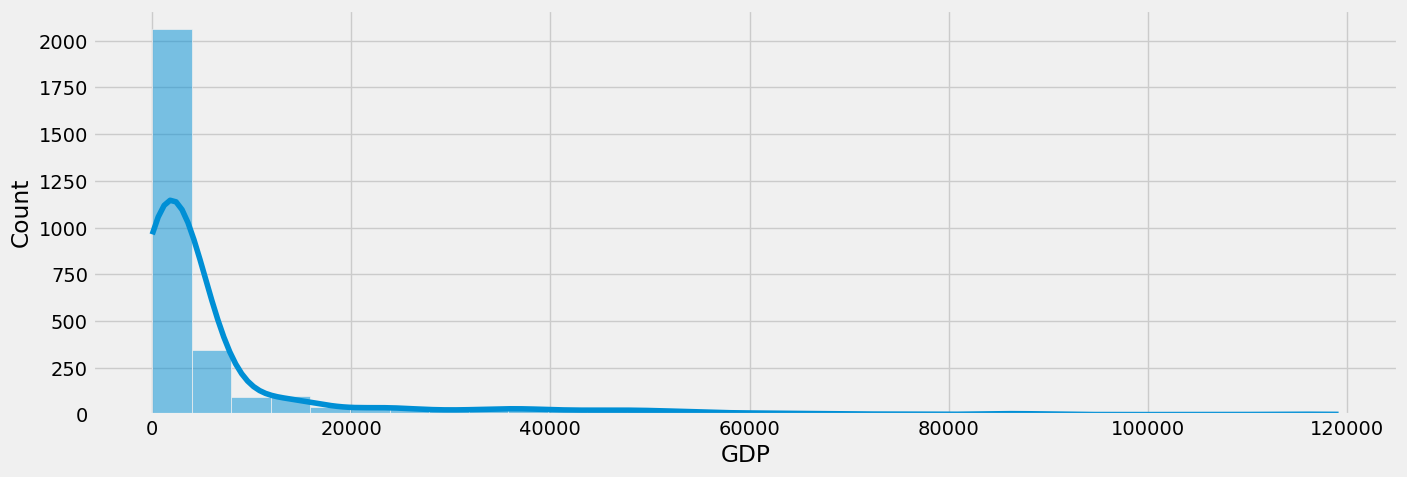

In [66]:
sns.histplot(x='GDP', data=df, bins=30,kde=True);

In [67]:
round(len(df[df['GDP'] > 20000])/len(df),3)

0.096

In [68]:
# df = df[df['GDP'] < 20000]

In [69]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Hepatitis B', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'ID'],
      dtype='object')

In [70]:
test.columns

Index(['ID', 'Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [71]:
min(df['under-five deaths '])

0

In [72]:
min(test['under-five deaths '])

0

In [73]:
for i in df.columns:
    if i != 'Life expectancy ':
        print(i)
        print('min df')
        print(min(df[i]))
        print('min test')
        print(min(test[i]))
        print('max df')
        print(max(df[i]))
        print('max test')
        print(max(test[i]))

Country
min df
Afghanistan
min test
Afghanistan
max df
Zimbabwe
max test
Zimbabwe
Year
min df
2000
min test
2000
max df
2015
max test
2015
Status
min df
Developed
min test
Developed
max df
Developing
max test
Developing
Adult Mortality
min df
1.0
min test
1
max df
699.0
max test
686
infant deaths
min df
0
min test
0
max df
1800
max test
1800
percentage expenditure
min df
0.0
min test
0.0
max df
19479.91161
max test
19099.04506
Hepatitis B
min df
1.0
min test
2.0
max df
99.0
max test
99.0
 BMI 
min df
1.0
min test
2.1
max df
77.6
max test
75.2
under-five deaths 
min df
0
min test
0
max df
2500
max test
2500
Polio
min df
3.0
min test
3.0
max df
99.0
max test
99.0
Diphtheria 
min df
2.0
min test
3.0
max df
99.0
max test
99.0
 HIV/AIDS
min df
0.1
min test
0.1
max df
50.6
max test
42.1
GDP
min df
1.68135
min test
14.142268
max df
119172.7418
max test
115761.577
 thinness  1-19 years
min df
0.1
min test
0.1
max df
27.7
max test
27.7
 thinness 5-9 years
min df
0.1
min test
0.1
max df
28.6
max

In [74]:
difference = set(df['Country'].values).difference(set(test['Country'].values))

l = list(difference)  

df = df[~df['Country'].isin(l)]

# Univariate analysis 

Univariate Analysisis perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [75]:
# Check the length unqiue values of each column
for column in list(df.columns):
    print(column,':' ,len(set(list(df[column]))))

Country : 178
Year : 16
Status : 2
Life expectancy  : 953
Adult Mortality : 422
infant deaths : 209
percentage expenditure : 2265
Hepatitis B : 243
 BMI  : 627
under-five deaths  : 252
Polio : 74
Diphtheria  : 82
 HIV/AIDS : 197
GDP : 2422
 thinness  1-19 years : 225
 thinness 5-9 years : 231
Income composition of resources : 625
Schooling : 174
ID : 2845


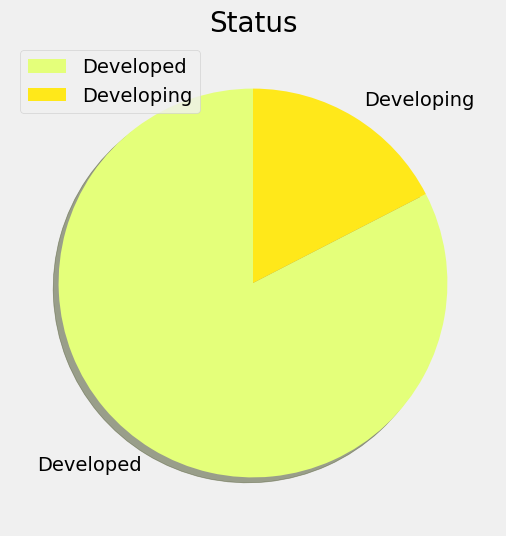

In [76]:
# plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Shade column
plt.subplot(1, 1, 1)
labels = set(list(df['Status']))
sizes = df['Status'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0]

plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title('Status', fontsize = 20)


plt.legend()
plt.show()

We can see that "Status" column is imbalanced, we might wanna consider that in order to avoid overfitting. For now, we will not change the distribution of that column.

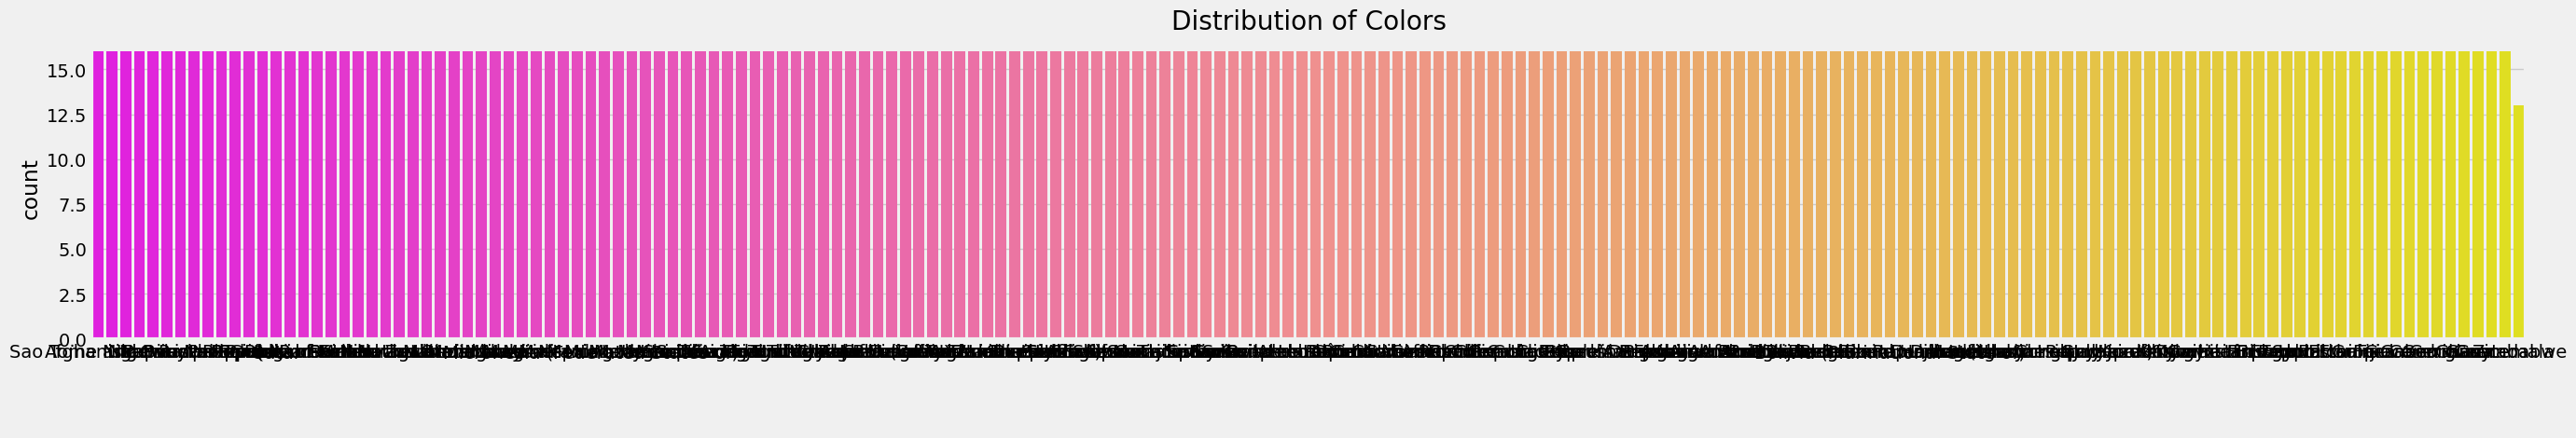

In [77]:
# check the distribution of Country 

plt.rcParams['figure.figsize'] = (30, 4)
sns.countplot(x=df['Country'], palette = 'spring',order = df['Country'].value_counts().index)
plt.xlabel(' ', fontsize = 50)
plt.title('Distribution of Colors')
plt.show()

In [78]:
# Distribution of Year

# sns.histplot(data=df, x="Year", kde=True, bins=16)

We can see that the feature of "Year" is almost distributed uniformly, which can benefit to our regression model.

In [79]:
# for i in list(df.columns):
#     sns.histplot(data=df, x=i, kde=True, bins=16)
#     plt.show()   

# Bivariate Analysis & Multivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* We will use the Correlation Heatmap to check the correlation between the Numerical Columns
* We will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* We will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

In [80]:
px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',
          box=True,title='Life expectancy Based on Countries status')

<AxesSubplot:ylabel='Life expectancy '>

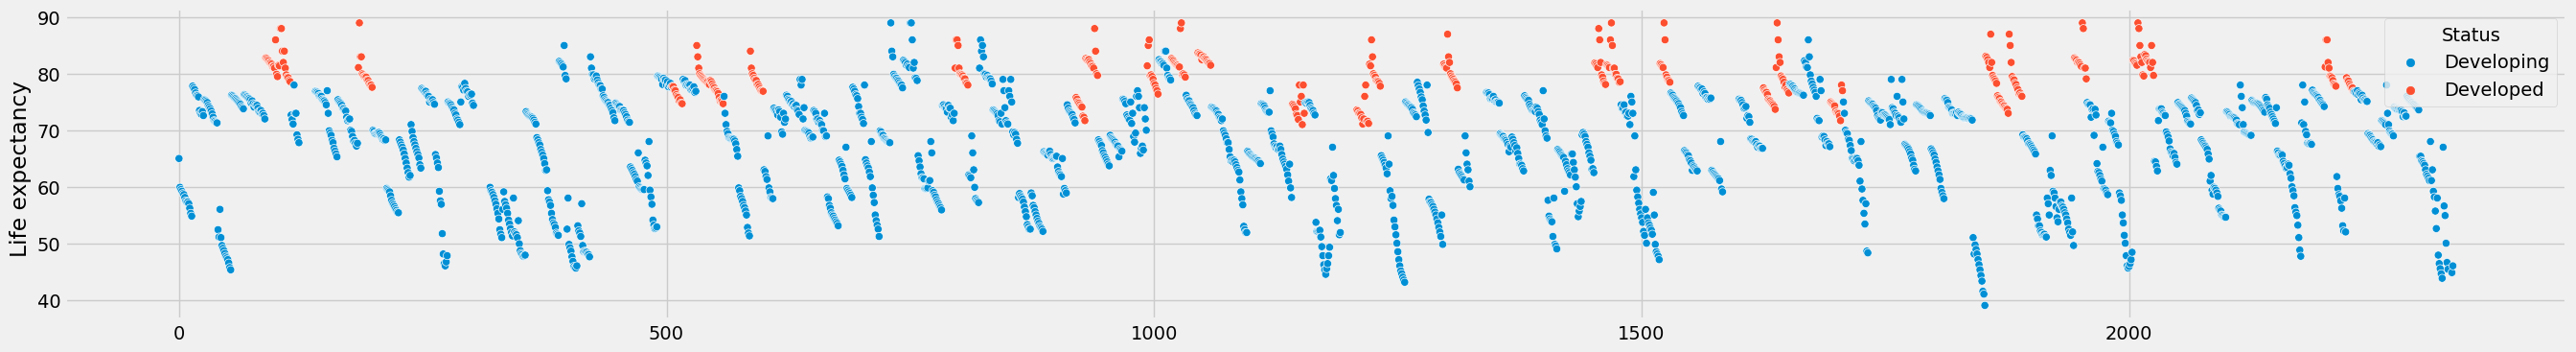

In [81]:
sns.scatterplot(data=df, x=df.index, y="Life expectancy ", hue="Status")

In [82]:
df.groupby('Country').agg({
    'Status':'first',
    'Life expectancy ':'mean',
})

Status  \
Country                                                          
Afghanistan                                         Developing   
Albania                                             Developing   
Algeria                                             Developing   
Angola                                              Developing   
Antigua and Barbuda                                 Developing   
Argentina                                           Developing   
Armenia                                             Developing   
Australia                                            Developed   
Austria                                              Developed   
Azerbaijan                                          Developing   
Bahrain                                             Developing   
Bangladesh                                          Developing   
Barbados                                            Developing   
Belarus                                             Developing   
Belgium                                              Developed   
Belize                                              Developing   
Benin                                               Developing   
Bhutan                                              Developing   
Bolivia (Plurinational State of)                    Developing   
Bosnia and Herzegovina                              Developing   
Botswana                                            Developing   
Brazil                                              Developing   
Brunei Darussalam                                   Developing   
Burkina Faso                                        Developing   
Burundi                                             Developing   
Cabo Verde                                          Developing   
Cambodia                                            Developing   
Cameroon                                            Developing   
Canada                                              Developing   
Central African Republic                            Developing   
...                                                        ...   
Sudan                                               Developing   
Suriname                                            Developing   
Swaziland                                           Developing   
Sweden                                               Developed   
Switzerland                                          Developed   
Syrian Arab Republic                                Developing   
Tajikistan                                          Developing   
Thailand                                            Developing   
The former Yugoslav republic of Macedonia           Developing   
Timor-Leste                                         Developing   
Togo                                                Developing   
Tonga                                               Developing   
Trinidad and Tobago                                 Developing   
Tunisia                                             Developing   
Turkey                                              Developing   
Turkmenistan                                        Developing   
Uganda                                              Developing   
Ukraine                                             Developing   
United Arab Emirates                                Developing   
United Kingdom of Great Britain and Northern Ir...   Developed   
United Republic of Tanzania                         Developing   
United States of America                             Developed   
Uruguay                                             Developing   
Uzbekistan                                          Developing   
Vanuatu                                             Developing   
Venezuela (Bolivarian Republic of)                  Developing   
Viet Nam                                            Developing   
Yemen                                               Developing   
Zambia                        

<AxesSubplot:xlabel='Country', ylabel='Life expectancy '>

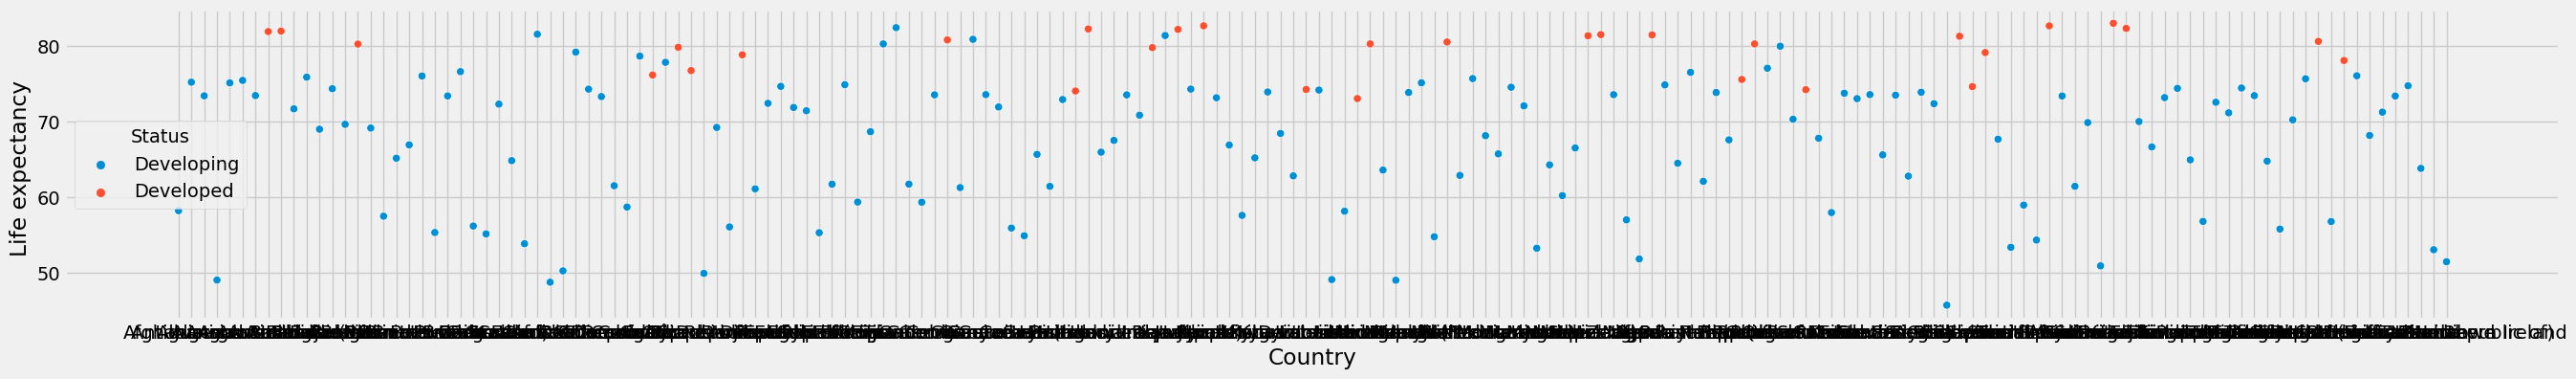

In [83]:
sns.scatterplot(data=df.groupby('Country').agg({
    'Status':'first',
    'Life expectancy ':'mean',
}), x=df.groupby('Country').agg({
    'Status':'first',
    'Life expectancy ':'mean',
}).index, y="Life expectancy ", hue="Status")

It is clearly that Developed countries has an higher Life expectancy

In [84]:
# px.scatter(df,y='Adult Mortality',x='Life expectancy ',color='Country',size='Life expectancy ',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')

In [85]:
df[df['Adult Mortality'] > 100][['Adult Mortality','Life expectancy ']].corr()

Adult Mortality  Life expectancy 
Adult Mortality          1.000000         -0.912517
Life expectancy         -0.912517          1.000000

We can see that regardless the outliers, meaning without the observation that their Adult Mortality is < 100, we get that Adult Mortality is highly correlated with out target variable - Life exxpectancy.

# Dealing with Categorical Columns - OneHot Encoding & Label Encoding

Categorical variables are known to hide and mask lots of interesting information in a data set. It’s crucial to learn the methods of dealing with such variables. If you won’t, many a times, you’d miss out on finding the most important variables in a model. It has happened with me. Initially, I used to focus more on numerical variables. Hence, never actually got an accurate model. But, later I discovered my flaws and learnt the art of dealing with such variables.

* There are various ways to encode categorical columns into Numerical columns
* This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
* Here, we are going to use Business Logic to encode the education column
* Then we will use the Label Encoder, to Department and Gender Columns

In [86]:
# check the categorical columns present in the data
df.select_dtypes('object').columns

Index(['Country', 'Status'], dtype='object')

In [87]:
# check the value counts for the Country column
df['Country'].value_counts()

Afghanistan                         16
Sao Tome and Principe               16
Niger                               16
Nigeria                             16
Norway                              16
Oman                                16
Pakistan                            16
Panama                              16
Papua New Guinea                    16
Peru                                16
Philippines                         16
Poland                              16
Portugal                            16
Qatar                               16
Republic of Korea                   16
Republic of Moldova                 16
Romania                             16
Russian Federation                  16
Rwanda                              16
Saint Lucia                         16
Saint Vincent and the Grenadines    16
Nicaragua                           16
New Zealand                         16
Netherlands                         16
Malta                               16
Liberia                  

In [88]:
df.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                     595
Adult Mortality                       0
infant deaths                         0
percentage expenditure                0
Hepatitis B                           0
 BMI                                  0
under-five deaths                     0
Polio                                 0
Diphtheria                            0
 HIV/AIDS                             0
GDP                                   0
 thinness  1-19 years                 0
 thinness 5-9 years                   0
Income composition of resources       0
Schooling                             0
ID                                 2250
dtype: int64

In [89]:
# encoding these categorical columns to convert them into numerical columns

dummies1 = pd.get_dummies(df['Country'])
df = pd.concat([df, dummies1], axis=1)

df = df.drop(['Country'], axis = 1)

# dummies2 = pd.get_dummies(df['Status'])
# df = pd.concat([df, dummies2], axis=1)

# df = df.drop(['Status'], axis = 1)

In [90]:
# We Can also use Label Encoding for Country to convert them into Numerical,
# but we wan't to have a dicionary for ourselves so we can know what each number represent.

# use Label Encoding for Direction to convert them into Numerical,
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# df['Country'] = le.fit_transform(df['Country'])

# test['Status'] = le.fit_transform(test['Status'])

# Check the data after encoding

# df = df.drop(['Country'], axis = 1)
# test = test.drop(['Country'], axis = 1)

# Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store athe rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

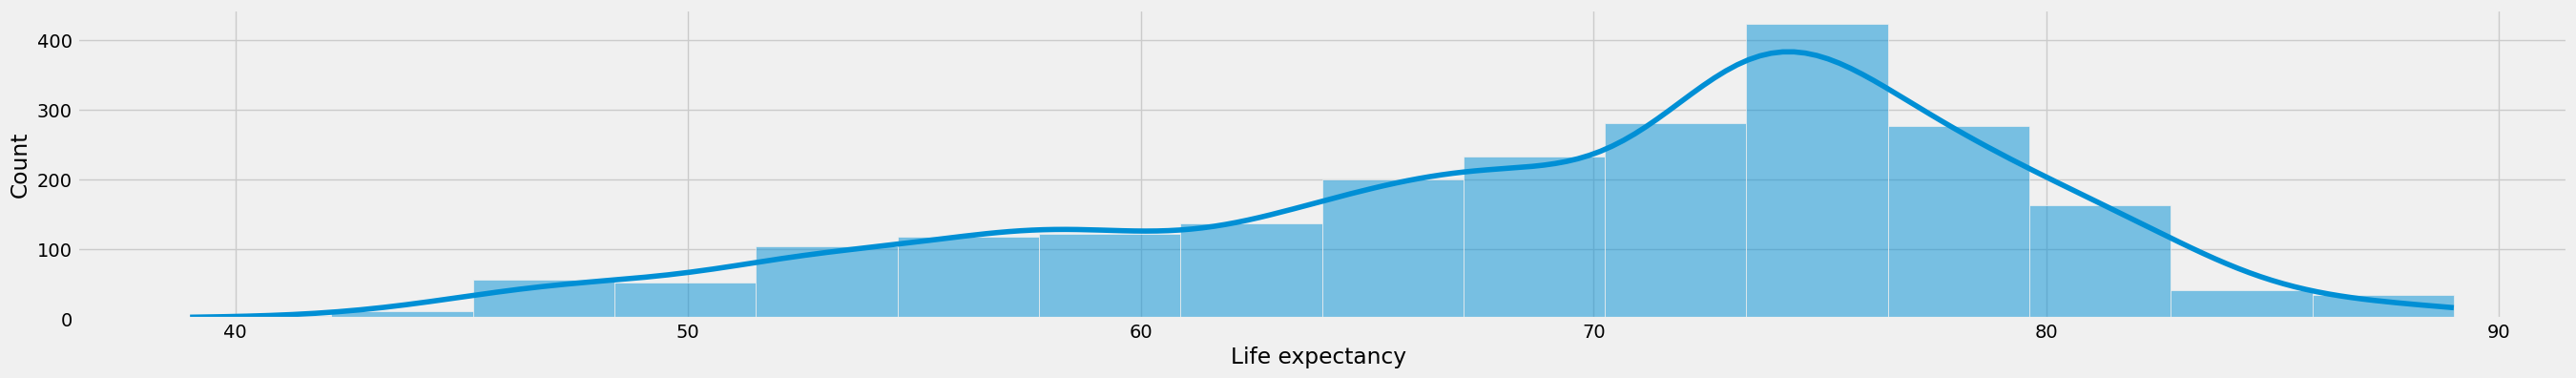

In [91]:
sns.histplot(data=df, x="Life expectancy ", kde=True, bins=16)

In [92]:
df1 = df[df['ID'].isna()]

test = df[df['ID'].notnull()]

df = df1.drop(['ID'], axis = 1)

In [93]:
# Split the target data from the df

y = df['Life expectancy ']
x = df.drop(['Life expectancy '], axis = 1)

# Print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)

# Create a validation set from the training data so that we can check whether the model that we have created is good enough

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.001, random_state = 42)

# Print the shapes 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_test.shape)
print("Shape of the y Valid :", y_test.shape)

Shape of the x : (2250, 194)
Shape of the y : (2250,)
Shape of the x Train : (2247, 194)
Shape of the y Train : (2247,)
Shape of the x Valid : (3, 194)
Shape of the y Valid : (3,)


In [94]:
print("Dimension of Train set as of now is ",x_train.shape)

Dimension of Train set as of now is  (2247, 194)


In [95]:
# X_train = preprocessing.scale(x_train)
# X_test = preprocessing.scale(x_test)

sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)
X_train = x_train
X_test = x_test

# test = preprocessing.scale(test)

In [96]:
test = test.set_index('ID')

test = test.drop(['Life expectancy '], axis = 1)

# Linear Regression

In [97]:
lr = LinearRegression()

linear_reg_model = lr.fit(X_train,y_train)

y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

print("The training R^2 score for linear model ",r2_score(y_train, y_train_pred))
print("The training RMSE score for linear model ",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for linear model  0.9671988036194281
The training RMSE score for linear model  1.7418112119478404


In [98]:
n_components = list(range(1,X_train.shape[1]+1,1))
pca = decomposition.PCA()

steps = [
#     ('scalar', StandardScaler()),
#     ("pca", pca),
#     ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
# Predicting the Test set results
y_pred = ridge_pipe.predict(X_test)

accuracies = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 20)

parameters = [ {
#     'pca__n_components': [1,2, 3, 4,5,6,7,8],
    'model__fit_intercept': [True, False],
    'model__normalize': [True, False]
} ]

scoring_func = make_scorer(mean_squared_error)
grid_search = HalvingGridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)  # <-- GETTING ERROR IN HERE

y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("The training R^2 score for best Optimized Ridge model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Optimized Ridge model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Optimized Ridge model is 0.9671987934909302

The training RMSE score for best Optimized Ridge model is 1.74181148086989


In [99]:
pd.DataFrame(lr.predict(test)).to_csv('Output.csv')

# Ridge

In [100]:
ridge = Ridge()

param_grid = {
            "alpha": [1e0,0.3,0.5, 0.1, 1e-2, 1e-3,1e-4,0.9,0.2,0.05],
            'tol': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'normalize' : [True, False],
            'solver' : ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
             }
grid = HalvingGridSearchCV(ridge, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

ridge_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 10
max_resources_: 2247
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2100
n_resources: 10
----------
iter: 1
n_candidates: 700
n_resources: 30
----------
iter: 2
n_candidates: 234
n_resources: 90
----------
iter: 3
n_candidates: 78
n_resources: 270
----------
iter: 4
n_candidates: 26
n_resources: 810
{'alpha': 0.3, 'normalize': True, 'solver': 'auto', 'tol': 1}


In [101]:
y_train_pred = ridge_best_model.predict(X_train)
y_test_pred = ridge_best_model.predict(X_test)

print("The training R^2 score for best Ridge Regression model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Ridge Regression model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Ridge Regression model is 0.9404264912456416

The training RMSE score for best Ridge Regression model is 2.3473769165467506


In [102]:
n_components = list(range(1,X_train.shape[1]+1,1))
pca = decomposition.PCA()

steps = [
#     ('scalar', StandardScaler()),
#     ("pca", pca),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
# Predicting the Test set results
y_pred = ridge_pipe.predict(X_test)

accuracies = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

parameters = [ {'model__alpha': [0.9,0.5,0.3, 0.1, 0.001, 0.0001],#np.arange(0, 0.9, 0.1),
#                 'pca__n_components': [1,2, 3, 4,5,6,7,8],
                           'model__tol': [1,3,5,7,9,10,12,14,15],
            'model__normalize' : [True, False],
            'model__solver' : ["auto", "svd", "cholesky"]}]# "lsqr", "sparse_cg", "sag", "saga"]} ]

scoring_func = make_scorer(mean_squared_error)
grid_search = HalvingGridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)  # <-- GETTING ERROR IN HERE
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("The training R^2 score for best Optimized Ridge model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Optimized Ridge model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Optimized Ridge model is 0.970145360149056

The training RMSE score for best Optimized Ridge model is 1.6617364946141595


In [103]:
pd.DataFrame(grid_search.predict(test)).to_csv('Output.csv')

# Kernel Ridge

In [104]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge()

param_grid = {
            "kernel":['linear','rbf'],
            "alpha": [1, 0.3,0.1, 1e-2, 1e-3,1e-4,1e-5], 
            "gamma": np.logspace(-2, 2, 8),
            "degree": [0, 1,2,3,4,5,6,7,8, 9,10]
             }
grid = HalvingGridSearchCV(krr, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

krr_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 10
max_resources_: 2247
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1232
n_resources: 10
----------
iter: 1
n_candidates: 411
n_resources: 30
----------
iter: 2
n_candidates: 137
n_resources: 90
----------
iter: 3
n_candidates: 46
n_resources: 270
----------
iter: 4
n_candidates: 16
n_resources: 810
{'alpha': 1, 'degree': 1, 'gamma': 0.13894954943731375, 'kernel': 'linear'}


In [105]:
y_train_pred = krr_best_model.predict(X_train)
y_test_pred = krr_best_model.predict(X_test)

print("The training R^2 score for best Kernel Ridge model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Kernel Ridge model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Kernel Ridge model is 0.9559584720896008

The training RMSE score for best Kernel Ridge model is 2.0183079378372364


In [106]:
n_components = list(range(1,X_train.shape[1]+1,1))
pca = decomposition.PCA()

steps = [
    ('scalar', StandardScaler()),
    ("pca", pca),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', KernelRidge())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
# Predicting the Test set results
y_pred = ridge_pipe.predict(X_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

parameters = [ {'model__alpha': np.arange(0, 0.9, 0.1),
                'pca__n_components': [1,2, 3, 4,5,6,7,8],
                           "model__kernel":['linear'],
            "model__gamma": np.logspace(-2, 2, 5),
            "model__degree": [4]} ]

from sklearn.metrics import fbeta_score, make_scorer
scoring_func = make_scorer(mean_squared_error)
grid_search = HalvingGridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)  # <-- GETTING ERROR IN HERE

In [107]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("The training R^2 score for best Optimized Kernel Ridge model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Optimized Kernel Ridge model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Optimized Kernel Ridge model is 0.8830660830304891

The training RMSE score for best Optimized Kernel Ridge model is 3.288716887400155


# Lasso

In [108]:
lasso = Lasso()

param_grid = {
            "alpha": [0.3,0.7,0.5,1, 0.1, 1e-2, 1e-3,1e-4,1e-5],
            'tol': [0,1,2,3,4,5,6,7,8,9],
        'normalize' : [True, False],
    'selection' : ["cyclic", "random"]
             }
grid = HalvingGridSearchCV(lasso, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

lasso_best_model = grid.fit(X_train, y_train) 

print(grid.best_params_) 

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 10
max_resources_: 2247
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 360
n_resources: 10
----------
iter: 1
n_candidates: 120
n_resources: 30
----------
iter: 2
n_candidates: 40
n_resources: 90
----------
iter: 3
n_candidates: 14
n_resources: 270
----------
iter: 4
n_candidates: 5
n_resources: 810
{'alpha': 0.5, 'normalize': False, 'selection': 'cyclic', 'tol': 1}


In [109]:
y_train_pred = lasso_best_model.predict(X_train)
y_test_pred = lasso_best_model.predict(X_test)

print("The training R^2 score for best Lasso Regression model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Lasso Regression model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Lasso Regression model is 0.8032085835679175

The training RMSE score for best Lasso Regression model is 4.266377844888721


In [110]:
n_components = list(range(1,X_train.shape[1]+1,1))
pca = decomposition.PCA()

steps = [
    ('scalar', StandardScaler()),
    ("pca", pca),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
# Predicting the Test set results
y_pred = ridge_pipe.predict(X_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

parameters = [ {'model__alpha': np.arange(0, 0.1, 0.03),
                           'model__tol': [0,1,2,3,4,5,6,7,8,9,10],
        'model__normalize' : [True, False],
    'model__selection' : ["cyclic", "random"]} ]

from sklearn.metrics import fbeta_score, make_scorer
scoring_func = make_scorer(mean_squared_error)
grid_search = HalvingGridSearchCV(estimator = ridge_pipe, 
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)  # <-- GETTING ERROR IN HERE

In [111]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("The training R^2 score for best Optimized Lasoo model is",r2_score(y_train, y_train_pred))
print()
print("The training RMSE score for best Optimized Lasso model is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for best Optimized Lasoo model is 0.9390450473019877

The training RMSE score for best Optimized Lasso model is 2.374437479924095


In [112]:
pd.DataFrame(lasso_best_model.predict(test)).to_csv('Output.csv')

In [113]:
for alpha in range(1,3):
    
    polynomial_regressor = PolynomialFeatures(degree = alpha)
    
    X_poly_train = polynomial_regressor.fit_transform(X_train)
    X_poly_test = polynomial_regressor.fit_transform(X_test)
    
    poly_reg_model = Ridge().fit(X_poly_train,y_train)
    
    y_train_pred = poly_reg_model.predict(X_poly_train)
    y_test_pred = poly_reg_model.predict(X_poly_test)

    train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
    test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

    print("The training R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_train, y_train_pred))
    print("The test R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_test, y_test_pred))
    print("The training RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
    print("The test RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_test_pred,y_test)))
    print()

The training R^2 score for polynomial model with degree  1 is 0.9593970796433032
The test R^2 score for polynomial model with degree  1 is 0.8088714978076108
The training RMSE score for polynomial model with degree  1 is 1.9379156734461862
The test RMSE score for polynomial model with degree  1 is 0.5201471071758931

The training R^2 score for polynomial model with degree  2 is 0.9691476223340301
The test R^2 score for polynomial model with degree  2 is 0.5502595905022448
The training RMSE score for polynomial model with degree  2 is 1.6892757942499628
The test RMSE score for polynomial model with degree  2 is 0.7978925586959569



In [114]:
for alpha in range(1,3):
    
    polynomial_regressor = PolynomialFeatures(degree = alpha)
    
    X_poly_train = polynomial_regressor.fit_transform(X_train)
    X_poly_test = polynomial_regressor.fit_transform(X_test)
    
    poly_reg_model = Lasso().fit(X_poly_train,y_train)
    
    y_train_pred = poly_reg_model.predict(X_poly_train)
    y_test_pred = poly_reg_model.predict(X_poly_test)

    train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
    test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

    print("The training R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_train, y_train_pred))
    print("The test R^2 score for polynomial model with degree ",alpha, "is",r2_score(y_test, y_test_pred))
    print("The training RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))
    print("The test RMSE score for polynomial model with degree ",alpha, "is",math.sqrt(mean_squared_error(y_test_pred,y_test)))
    print()

The training R^2 score for polynomial model with degree  1 is 0.8219395391583751
The test R^2 score for polynomial model with degree  1 is -0.3790607354718565
The training RMSE score for polynomial model with degree  1 is 4.058261108658312
The test RMSE score for polynomial model with degree  1 is 1.3971889942114941

The training R^2 score for polynomial model with degree  2 is 0.9747970396706304
The test R^2 score for polynomial model with degree  2 is 0.7007091196978397
The training RMSE score for polynomial model with degree  2 is 1.5267995297269095
The test RMSE score for polynomial model with degree  2 is 0.650893899448165



In [115]:
polynomial_regressor = PolynomialFeatures(degree = 2)

X_poly_train = polynomial_regressor.fit_transform(X_train)
X_poly_test = polynomial_regressor.fit_transform(X_test)

param_grid = {
            "alpha": [0.0001,0.001,0.1,0.5,0.9],
            'tol': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'normalize' : [True, False],
            'solver' : ["auto", "svd", "cholesky"]#, "lsqr", "sparse_cg", "sag", "saga"]
             }

grid = HalvingGridSearchCV(Ridge(), param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

best_model = grid.fit(X_poly_train,y_train) 

print(grid.best_params_) 

y_train_pred = poly_reg_model.predict(X_poly_train)
y_test_pred = poly_reg_model.predict(X_poly_test)

train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

print("The training R^2 score for polynomial model with degree 2", "is",r2_score(y_train, y_train_pred))
print("The training RMSE score for polynomial model with degree 2", "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 10
max_resources_: 2247
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 450
n_resources: 10
----------
iter: 1
n_candidates: 150
n_resources: 30
----------
iter: 2
n_candidates: 50
n_resources: 90
----------
iter: 3
n_candidates: 17
n_resources: 270
----------
iter: 4
n_candidates: 6
n_resources: 810
{'alpha': 0.1, 'normalize': True, 'solver': 'svd', 'tol': 11}
The training R^2 score for polynomial model with degree 2 is 0.9747970396706304
The training RMSE score for polynomial model with degree 2 is 1.5267995297269095


In [116]:
polynomial_regressor = PolynomialFeatures(degree = 2)

X_poly_train = polynomial_regressor.fit_transform(X_train)
X_poly_test = polynomial_regressor.fit_transform(X_test)

poly_reg_model = KernelRidge(
    alpha=0.0001,
    kernel='linear',
    gamma=100,
    degree=100,
    coef0=100,
).fit(X_poly_train,y_train)

y_train_pred = poly_reg_model.predict(X_poly_train)
y_test_pred = poly_reg_model.predict(X_poly_test)

train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

print("The training R^2 score for polynomial model with degree 2", "is",r2_score(y_train, y_train_pred))
print("The training RMSE score for polynomial model with degree 2", "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for polynomial model with degree 2 is 0.9646844356294523
The training RMSE score for polynomial model with degree 2 is 1.8073377303164089


In [117]:
pd.DataFrame(poly_reg_model.predict(polytest)).to_csv('Output.csv')

NameError: name 'polytest' is not defined

In [ ]:
polynomial_regressor = PolynomialFeatures(degree = 2)

X_poly_train = polynomial_regressor.fit_transform(X_train)
X_poly_test = polynomial_regressor.fit_transform(X_test)

poly_reg_model = Ridge(
    alpha=0.06,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    positive=False,
    random_state=10,
).fit(X_poly_train,y_train)

y_train_pred = poly_reg_model.predict(X_poly_train)
y_test_pred = poly_reg_model.predict(X_poly_test)

train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

print("The training R^2 score for polynomial model with degree 2", "is",r2_score(y_train, y_train_pred))
print("The training RMSE score for polynomial model with degree 2", "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

# The only required model

In [119]:
polynomial_regressor = PolynomialFeatures(degree = 2)

X_poly_train = polynomial_regressor.fit_transform(X_train)
X_poly_test = polynomial_regressor.fit_transform(X_test)

poly_reg_model = Lasso(
    alpha=0.14,
    fit_intercept=True,
    normalize='deprecated',
    precompute=False,
    copy_X=False,
    max_iter=1600,
    tol=0.000001,
    warm_start=False,
    positive=False,
    random_state=10,
    selection='cyclic',
).fit(X_poly_train,y_train)

y_train_pred = poly_reg_model.predict(X_poly_train)
y_test_pred = poly_reg_model.predict(X_poly_test)

train_score = math.sqrt(mean_squared_error(y_train_pred,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred,y_test))

print("The training R^2 score for polynomial model with degree ", "is",r2_score(y_train, y_train_pred))
print("The training RMSE score for polynomial model with degree ", "is",math.sqrt(mean_squared_error(y_train_pred,y_train)))

The training R^2 score for polynomial model with degree  is 0.9789062810930131
The training RMSE score for polynomial model with degree  is 1.3967954663953475


In [120]:
polytest = polynomial_regressor.fit_transform(test)

In [121]:
pd.DataFrame(poly_reg_model.predict(polytest)).to_csv('Output.csv')